В этом проекте нужно спрогнозировать стоимость домов в зависимости от входных данных.

# Загрузка библиотек и просмотр общей информации по датасетам 

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial

import warnings
warnings.filterwarnings("ignore", '`distplot` is a deprecated function and will be removed in a future version')
warnings.filterwarnings("ignore", 'Pass the following variable as a keyword arg: x')




sns.set(style="white", palette="muted", color_codes=True)
%matplotlib inline

Подгружаем датасеты

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
# этой функцией буду считать пропуски
def show_nan(data):
    try:
        for column in data.columns:
            if data[column].isnull().sum() > 0:
                print(f'Количество пропусков в столбце {column} = {data[column].isnull().sum()}')
    except AttributeError:
        print(f'Количество пропусков в столбце {data.isnull().sum()}')

In [8]:
def show_train_test_col(colname):
    print(f'Количество пропусков в {colname} в обучающем наборе = {train[colname].isnull().sum()}')
    print(f'Количество пропусков в {colname} в тестовом наборе = {test[colname].isnull().sum()}')

In [9]:
show_nan(train)

Количество пропусков в столбце LotFrontage = 259
Количество пропусков в столбце Alley = 1369
Количество пропусков в столбце MasVnrType = 8
Количество пропусков в столбце MasVnrArea = 8
Количество пропусков в столбце BsmtQual = 37
Количество пропусков в столбце BsmtCond = 37
Количество пропусков в столбце BsmtExposure = 38
Количество пропусков в столбце BsmtFinType1 = 37
Количество пропусков в столбце BsmtFinType2 = 38
Количество пропусков в столбце Electrical = 1
Количество пропусков в столбце FireplaceQu = 690
Количество пропусков в столбце GarageType = 81
Количество пропусков в столбце GarageYrBlt = 81
Количество пропусков в столбце GarageFinish = 81
Количество пропусков в столбце GarageQual = 81
Количество пропусков в столбце GarageCond = 81
Количество пропусков в столбце PoolQC = 1453
Количество пропусков в столбце Fence = 1179
Количество пропусков в столбце MiscFeature = 1406


In [10]:
show_nan(test)

Количество пропусков в столбце MSZoning = 4
Количество пропусков в столбце LotFrontage = 227
Количество пропусков в столбце Alley = 1352
Количество пропусков в столбце Utilities = 2
Количество пропусков в столбце Exterior1st = 1
Количество пропусков в столбце Exterior2nd = 1
Количество пропусков в столбце MasVnrType = 16
Количество пропусков в столбце MasVnrArea = 15
Количество пропусков в столбце BsmtQual = 44
Количество пропусков в столбце BsmtCond = 45
Количество пропусков в столбце BsmtExposure = 44
Количество пропусков в столбце BsmtFinType1 = 42
Количество пропусков в столбце BsmtFinSF1 = 1
Количество пропусков в столбце BsmtFinType2 = 42
Количество пропусков в столбце BsmtFinSF2 = 1
Количество пропусков в столбце BsmtUnfSF = 1
Количество пропусков в столбце TotalBsmtSF = 1
Количество пропусков в столбце BsmtFullBath = 2
Количество пропусков в столбце BsmtHalfBath = 2
Количество пропусков в столбце KitchenQual = 1
Количество пропусков в столбце Functional = 2
Количество пропусков

Рассмотрим каждый признак в отдельности, посмотрим на распределения и построим гистограммы для обучающей и тестовой выборки:

**Признак MSSubClass**


Это признак означает класс здания

Построим гистограммы и боксплоты с помощью функции:

In [402]:
def show_hist_and_box(df_col):
    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    
    sns.distplot(df_col, bins=50, ax=axes[0])
    sns.boxplot(df_col, ax=axes[1])
    
    sns.despine()

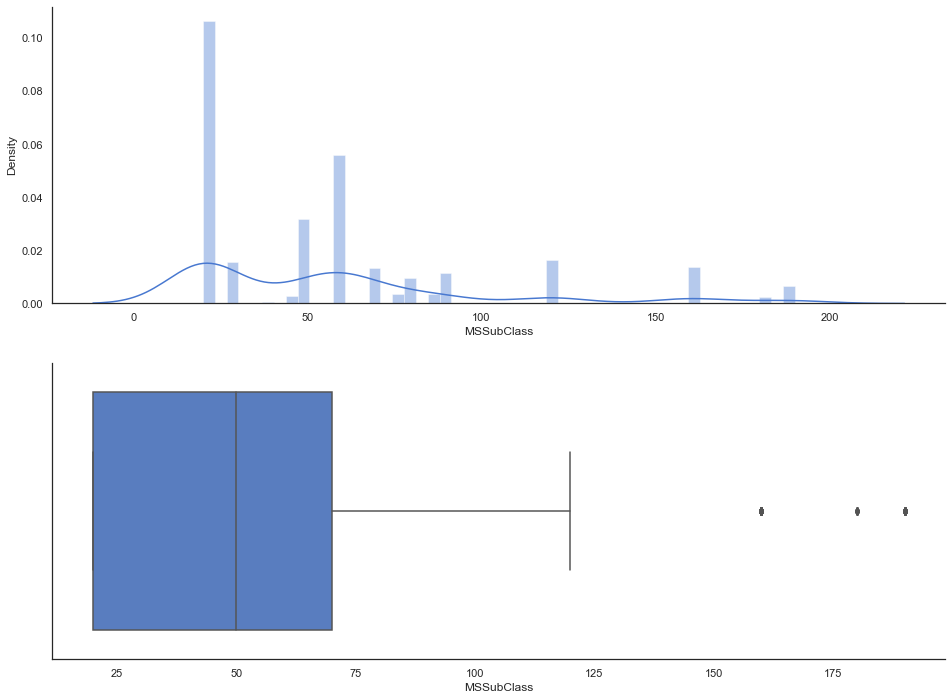

In [403]:
show_hist_and_box(train['MSSubClass'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


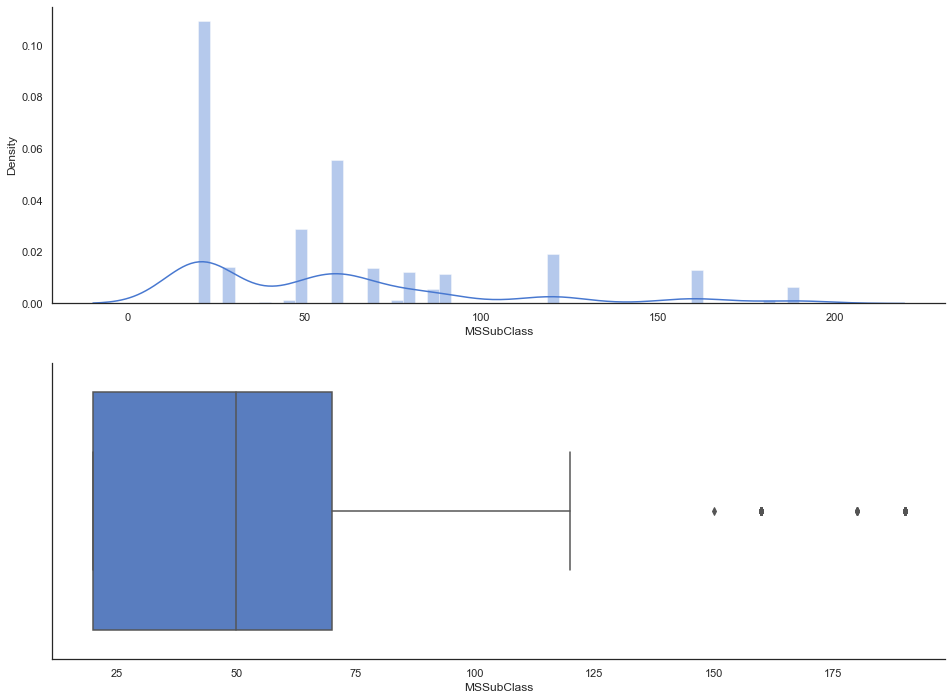

In [13]:
show_hist_and_box(test['MSSubClass'])

In [14]:
train['MSSubClass'].value_counts(ascending=False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [15]:
test['MSSubClass'].value_counts(ascending=False)

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
75       7
180      7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

In [16]:
show_train_test_col('MSSubClass')

Количество пропусков в MSSubClass в обучающем наборе = 0
Количество пропусков в MSSubClass в тестовом наборе = 0


**Признак MSZoning**

Этот признак означает классификацию по главной зоне

In [17]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [18]:
test['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

Как видно, в тестовых признаках есть пропуски

In [19]:
show_nan(test['MSZoning'])

Количество пропусков в столбце 4


In [20]:
test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Больше всего признаков RL, заполним этим значением пропуски:

In [21]:
test['MSZoning'] = test['MSZoning'].fillna('RL')

In [22]:
test['MSZoning'].value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

**Признак LotFrontage**

Линейная длина улицы

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


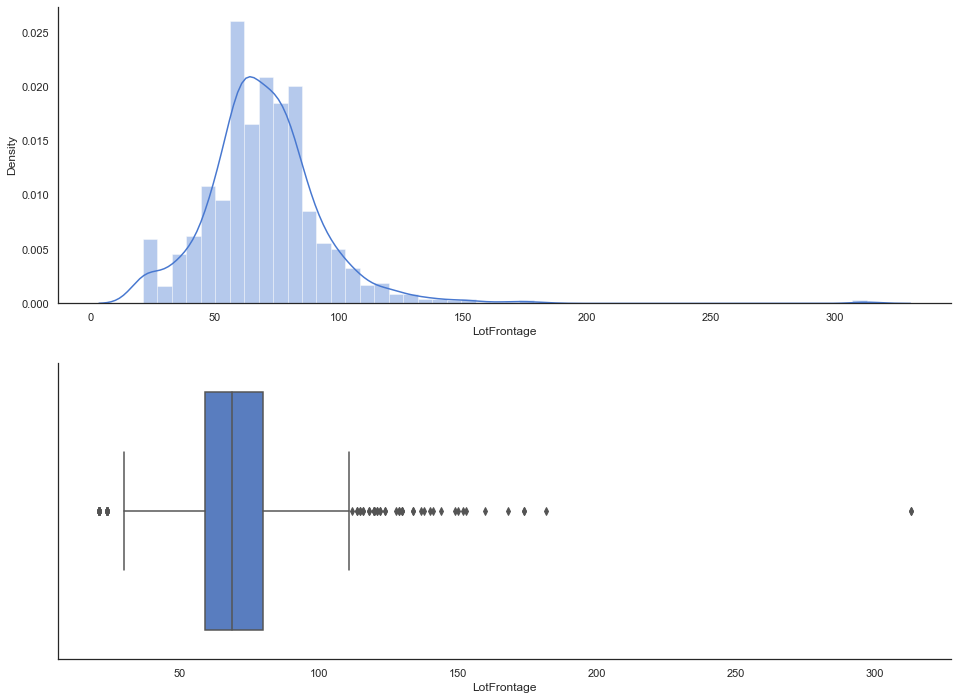

In [23]:
show_hist_and_box(train['LotFrontage'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


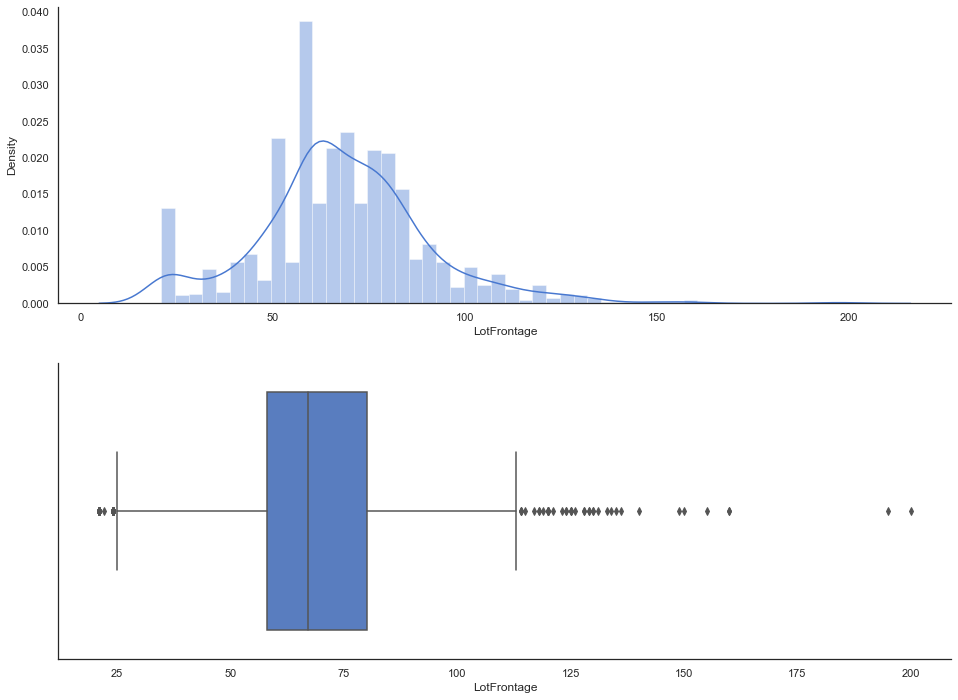

In [24]:
show_hist_and_box(test['LotFrontage'])

Удалим из обучающего набора признак > 200

In [25]:
train = train[train['LotFrontage'] < 200]

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


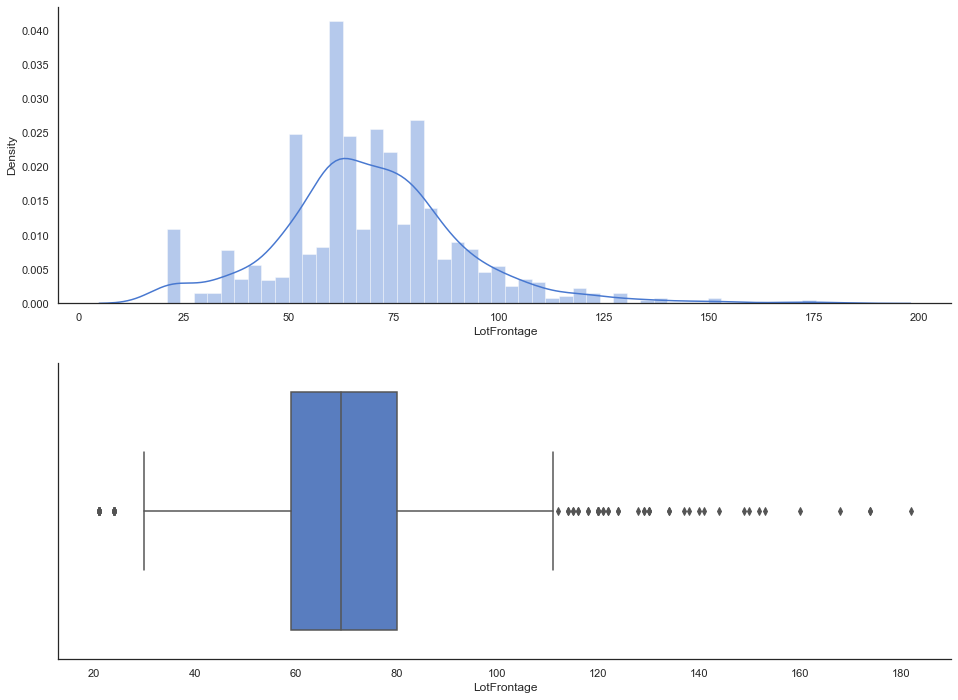

In [26]:
show_hist_and_box(train['LotFrontage'])

In [27]:
show_train_test_col('LotFrontage')

Количество пропусков в LotFrontage в обучающем наборе = 0
Количество пропусков в LotFrontage в тестовом наборе = 227


Заполним пропуски в тест медианным значением:

In [28]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

**Признак LotArea**

Размер зоны в квадратных фунтах

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


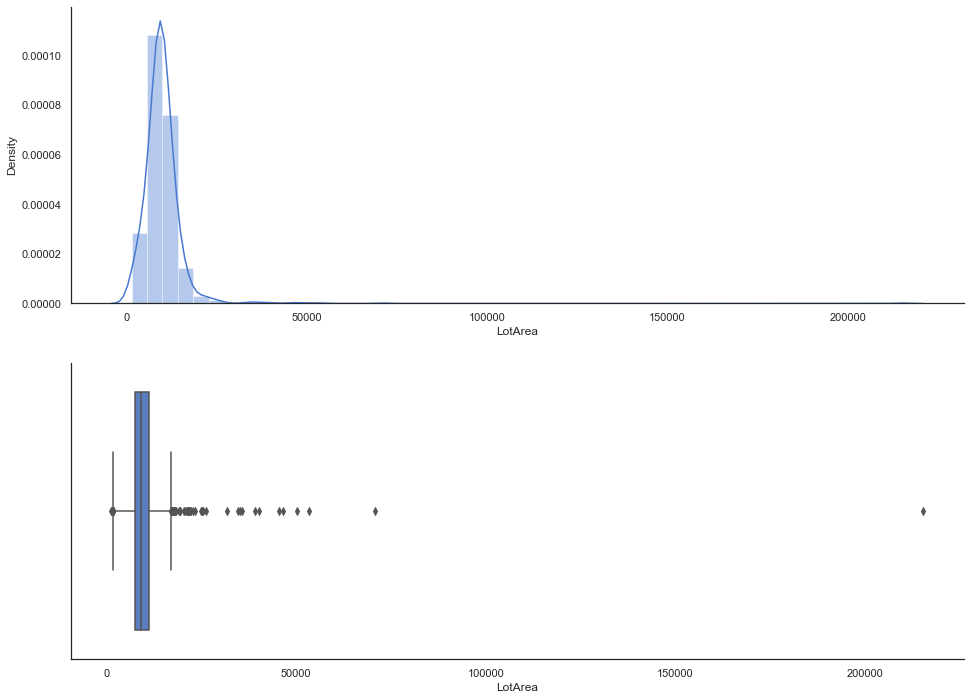

In [29]:
show_hist_and_box(train['LotArea'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


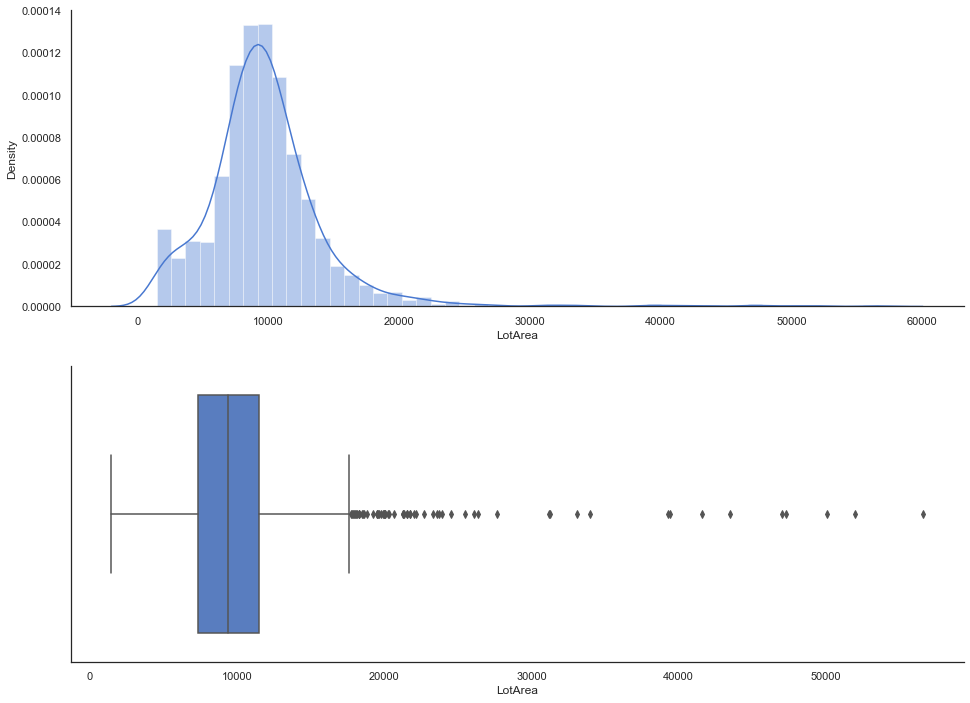

In [30]:
show_hist_and_box(test['LotArea'])

In [31]:
test['LotArea'].max()

56600

Удалим все выбросы выше 60000 в тренеровочном наборе данных

In [32]:
train['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1199, dtype: int64

In [33]:
train = train[train['LotArea'] < 60000]

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


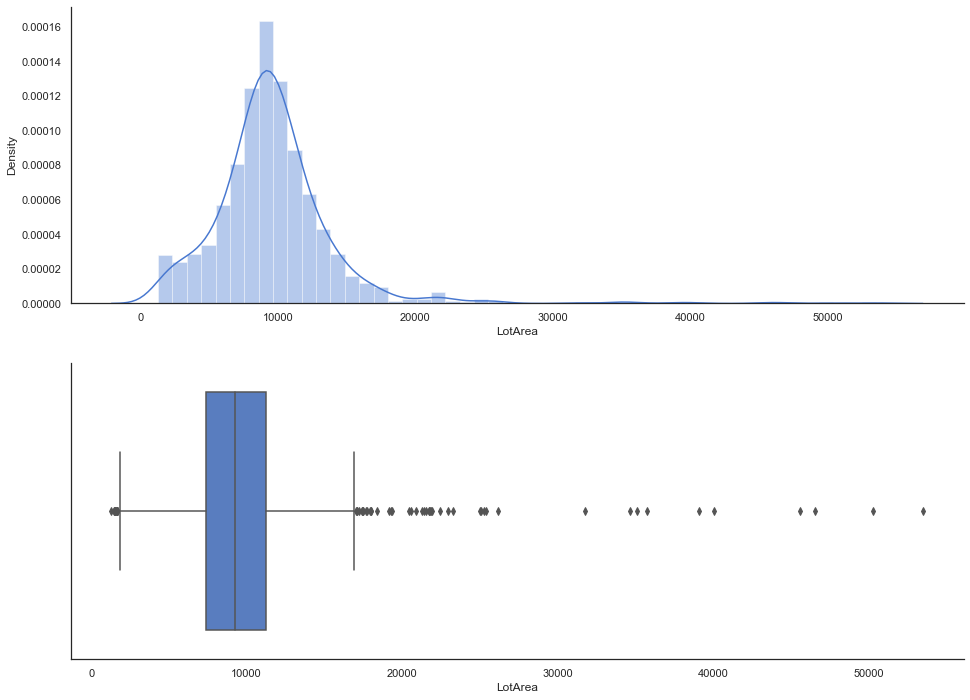

In [34]:
show_hist_and_box(train['LotArea'])

In [35]:
show_train_test_col('LotArea')

Количество пропусков в LotArea в обучающем наборе = 0
Количество пропусков в LotArea в тестовом наборе = 0


**Признак Street**

Доступность дороги

In [36]:
train['Street'].value_counts()

Pave    1192
Grvl       5
Name: Street, dtype: int64

In [37]:
test['Street'].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [38]:
show_train_test_col('Street')

Количество пропусков в Street в обучающем наборе = 0
Количество пропусков в Street в тестовом наборе = 0


**Признак Alley**

Доступность аллеи

In [39]:
train['Alley'].value_counts()

Grvl    47
Pave    39
Name: Alley, dtype: int64

In [40]:
test['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [41]:
train[['Alley', 'Street']][train['Alley'].notnull()]

Alley Street
21    Grvl   Pave
30    Pave   Pave
56    Pave   Pave
79    Grvl   Pave
87    Pave   Pave
...    ...    ...
1404  Grvl   Pave
1414  Pave   Pave
1427  Grvl   Pave
1432  Grvl   Pave
1454  Pave   Pave

[86 rows x 2 columns]

Заполним все пропуски значениями Pave, так как, возможно аллей в брусчатке больше

In [42]:
for i in train, test:
    i['Alley'].fillna('Pave', inplace=True)

In [43]:
show_train_test_col('Alley')

Количество пропусков в Alley в обучающем наборе = 0
Количество пропусков в Alley в тестовом наборе = 0


**Признак LotShape**

Общая форма собственности

In [44]:
train['LotShape'].value_counts()

Reg    851
IR1    316
IR2     25
IR3      5
Name: LotShape, dtype: int64

In [45]:
test['LotShape'].value_counts()

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

In [46]:
show_train_test_col('LotShape')

Количество пропусков в LotShape в обучающем наборе = 0
Количество пропусков в LotShape в тестовом наборе = 0


**Признак LandContour**

Право собственности

In [47]:
train['LandContour'].value_counts()

Lvl    1082
Bnk      55
HLS      45
Low      15
Name: LandContour, dtype: int64

In [48]:
test['LandContour'].value_counts()

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

In [49]:
show_train_test_col('LandContour')

Количество пропусков в LandContour в обучающем наборе = 0
Количество пропусков в LandContour в тестовом наборе = 0


**Признак Utilities**

Тип доступных коммунальных услуг

In [50]:
train['Utilities'].value_counts()

AllPub    1197
Name: Utilities, dtype: int64

In [51]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [52]:
show_train_test_col('Utilities')

Количество пропусков в Utilities в обучающем наборе = 0
Количество пропусков в Utilities в тестовом наборе = 2


In [53]:
# заполним пропуски в тест
test['Utilities'].fillna('AllPub', inplace=True)

In [54]:
test['Utilities'].value_counts()

AllPub    1459
Name: Utilities, dtype: int64

**Признак LotConfig**

Конфигурация лота

In [55]:
train['LotConfig'].value_counts()

Inside     915
Corner     200
CulDSac     45
FR2         33
FR3          4
Name: LotConfig, dtype: int64

In [56]:
test['LotConfig'].value_counts()

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

In [57]:
show_train_test_col('LotConfig')

Количество пропусков в LotConfig в обучающем наборе = 0
Количество пропусков в LotConfig в тестовом наборе = 0


**Признак LandSlope**

Уклон места

In [58]:
train['LandSlope'].value_counts()

Gtl    1147
Mod      46
Sev       4
Name: LandSlope, dtype: int64

In [59]:
test['LandSlope'].value_counts()

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

In [60]:
show_train_test_col('LandSlope')

Количество пропусков в LandSlope в обучающем наборе = 0
Количество пропусков в LandSlope в тестовом наборе = 0


**Признак Neighborhood**

Физическое положение в пределах Ames city

In [61]:
train['Neighborhood'].value_counts()

NAmes      185
CollgCr    126
OldTown    109
Edwards     91
Somerst     78
NridgHt     76
BrkSide     51
SawyerW     50
Gilbert     49
Sawyer      48
NWAmes      45
Crawfor     41
Mitchel     36
IDOTRR      34
NoRidge     33
Timber      29
SWISU       23
StoneBr     20
BrDale      16
MeadowV     15
Blmngtn     14
ClearCr     12
Veenker      7
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64

In [62]:
test['Neighborhood'].value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [63]:
show_train_test_col('Neighborhood')

Количество пропусков в Neighborhood в обучающем наборе = 0
Количество пропусков в Neighborhood в тестовом наборе = 0


**Признак Condition1**

Близость к главной дороге или железной дороге

In [64]:
train['Condition1'].value_counts()

Norm      1035
Feedr       66
Artery      46
RRAn        24
RRAe         9
PosN         9
RRNn         4
PosA         3
RRNe         1
Name: Condition1, dtype: int64

In [65]:
test['Condition1'].value_counts()

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64

In [66]:
show_train_test_col('Condition1')

Количество пропусков в Condition1 в обучающем наборе = 0
Количество пропусков в Condition1 в тестовом наборе = 0


**Признак Condition1**

In [67]:
train['Condition2'].value_counts()

Norm      1184
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
Name: Condition2, dtype: int64

In [68]:
test['Condition2'].value_counts()

Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64

In [69]:
show_train_test_col('Condition2')

Количество пропусков в Condition2 в обучающем наборе = 0
Количество пропусков в Condition2 в тестовом наборе = 0


**Признак BldgType**

Тип здания

In [70]:
train['BldgType'].value_counts()

1Fam      990
TwnhsE     92
Duplex     47
Twnhs      40
2fmCon     28
Name: BldgType, dtype: int64

In [71]:
test['BldgType'].value_counts()

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

In [72]:
show_train_test_col('BldgType')

Количество пропусков в BldgType в обучающем наборе = 0
Количество пропусков в BldgType в тестовом наборе = 0


**Признак HouseStyle**

Стиль здания

In [73]:
train['HouseStyle'].value_counts()

1Story    595
2Story    361
1.5Fin    136
SLvl       44
SFoyer     30
1.5Unf     13
2.5Unf     10
2.5Fin      8
Name: HouseStyle, dtype: int64

In [74]:
test['HouseStyle'].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

В обучающем наборе есть 8 признаков 2.5 fin. Возможно это ошибка, сделаем эти признаки 1.5fin

In [75]:
train.loc[train['HouseStyle'] == '2.5Fin', 'HouseStyle'] = '1.5Fin'

In [76]:
train['HouseStyle'].value_counts()

1Story    595
2Story    361
1.5Fin    144
SLvl       44
SFoyer     30
1.5Unf     13
2.5Unf     10
Name: HouseStyle, dtype: int64

In [77]:
show_train_test_col('HouseStyle')

Количество пропусков в HouseStyle в обучающем наборе = 0
Количество пропусков в HouseStyle в тестовом наборе = 0


**Признак OverallQual**

Общее качество материала и отделки

In [78]:
train['OverallQual'].value_counts()

5     333
6     282
7     263
8     142
4      98
9      42
3      17
10     16
2       3
1       1
Name: OverallQual, dtype: int64

In [79]:
test['OverallQual'].value_counts()

5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64

In [80]:
show_train_test_col('OverallQual')

Количество пропусков в OverallQual в обучающем наборе = 0
Количество пропусков в OverallQual в тестовом наборе = 0


**Признак OverallCond**

Общий рейтинг состояния

In [81]:
train['OverallCond'].value_counts()

5    681
6    206
7    164
8     60
4     46
3     20
9     15
2      5
Name: OverallCond, dtype: int64

In [82]:
test['OverallCond'].value_counts()

5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64

In [83]:
show_train_test_col('OverallCond')

Количество пропусков в OverallCond в обучающем наборе = 0
Количество пропусков в OverallCond в тестовом наборе = 0


**Признак YearBuilt**

Дата постройки

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


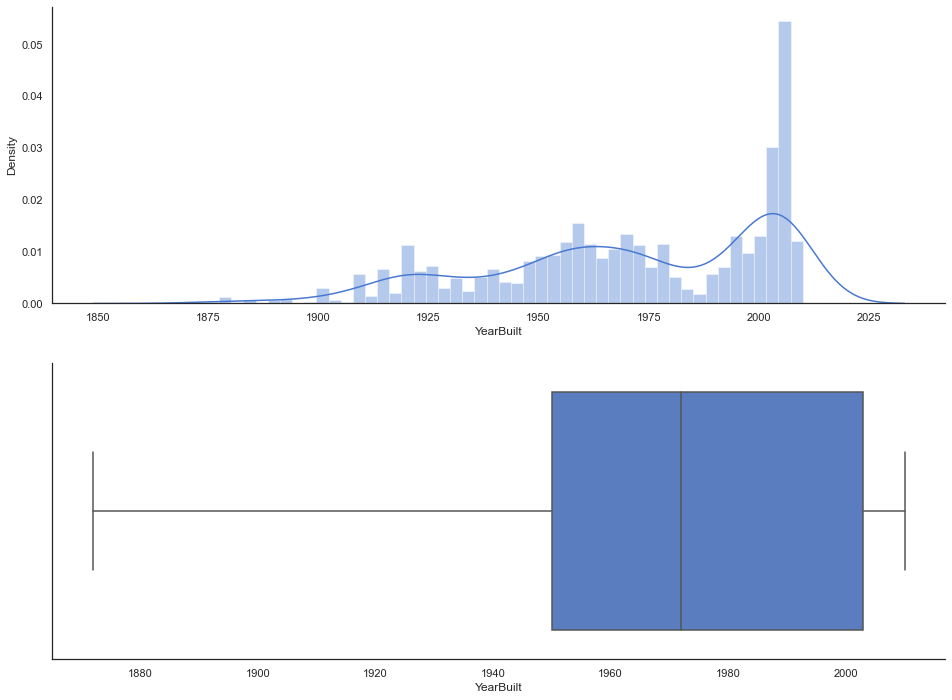

In [84]:
show_hist_and_box(train['YearBuilt'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


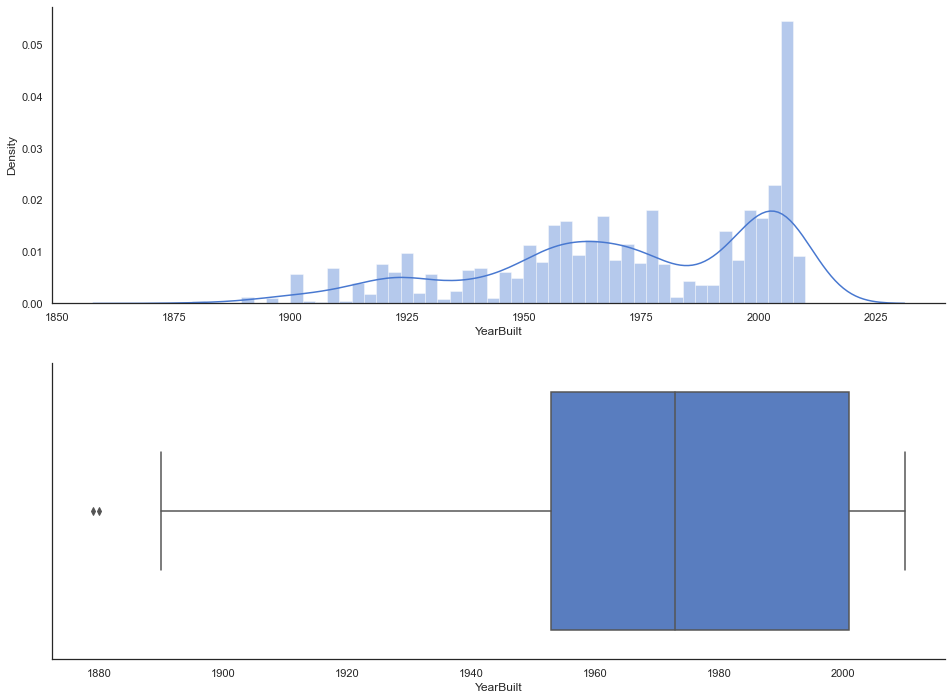

In [85]:
show_hist_and_box(test['YearBuilt'])

In [86]:
train = train[train['YearBuilt'] > 1878]

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


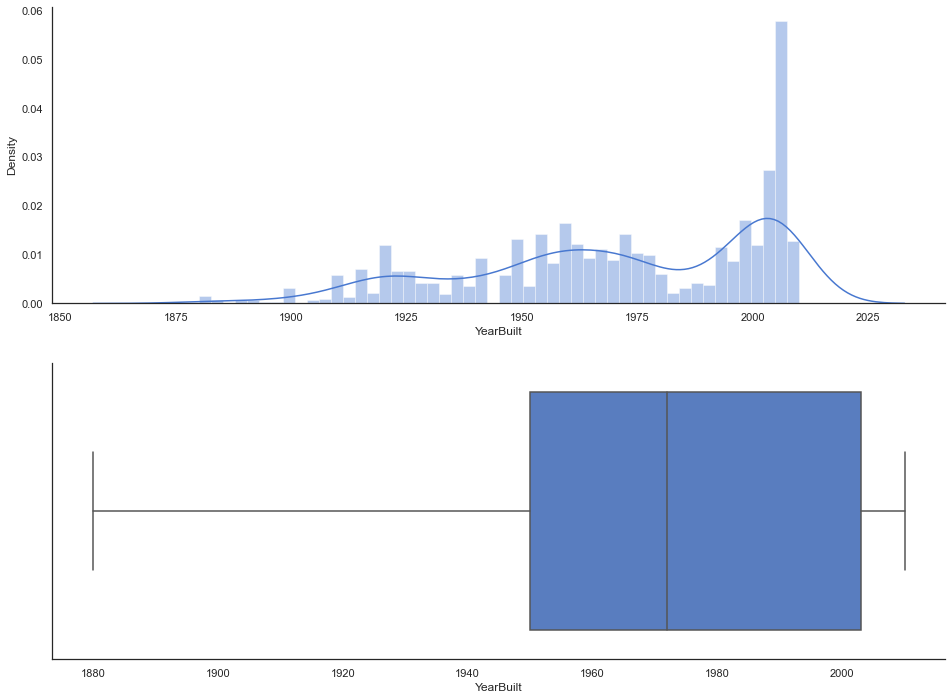

In [87]:
show_hist_and_box(train['YearBuilt'])

In [88]:
show_train_test_col('YearBuilt')

Количество пропусков в YearBuilt в обучающем наборе = 0
Количество пропусков в YearBuilt в тестовом наборе = 0


**Признак YearRemodAdd**

Дата перепланировки

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


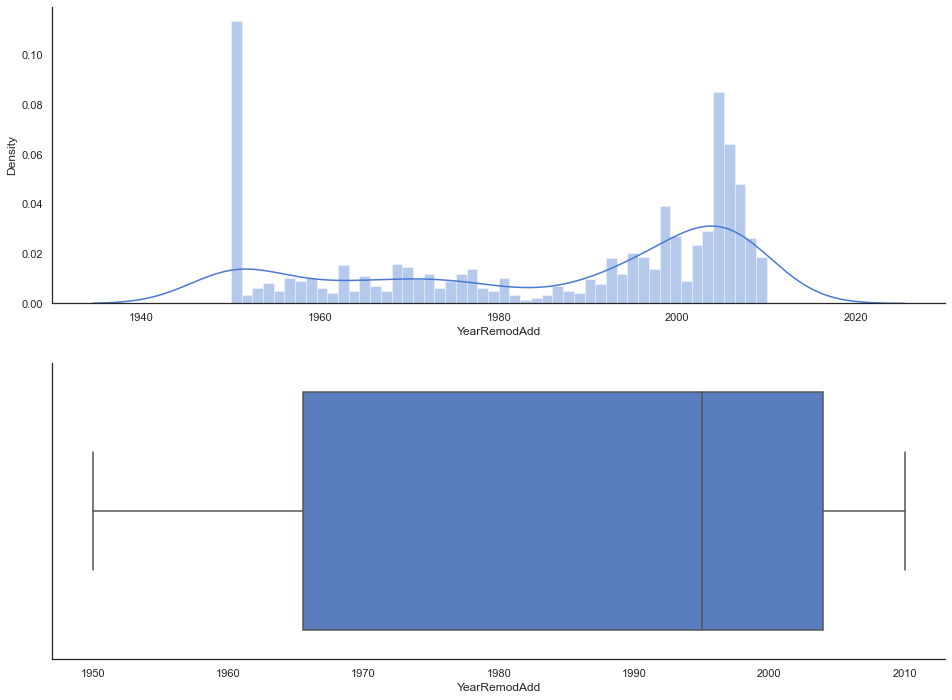

In [89]:
show_hist_and_box(train['YearRemodAdd'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


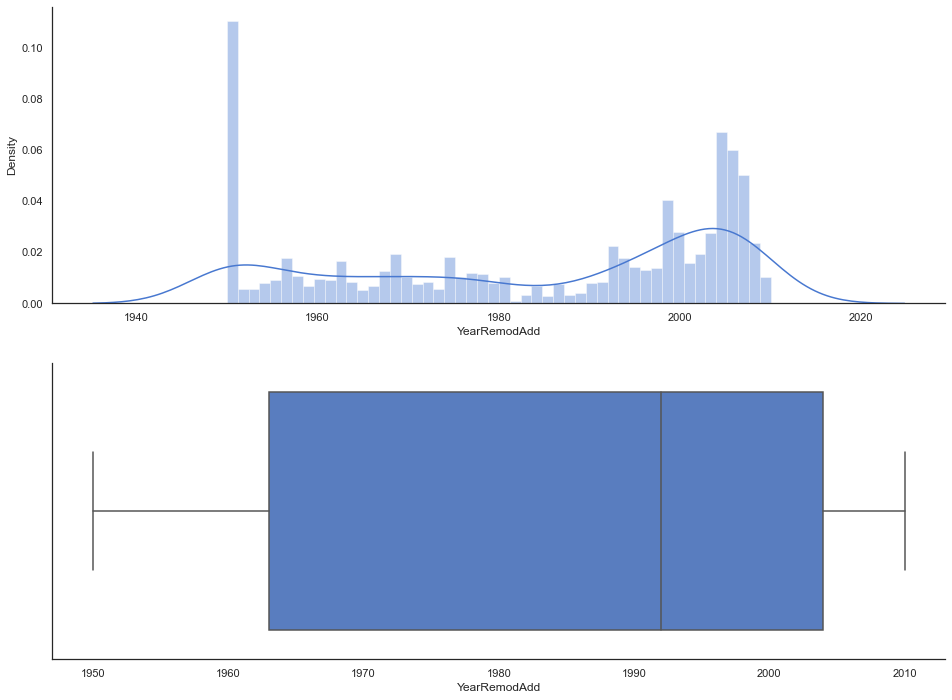

In [90]:
show_hist_and_box(test['YearRemodAdd'])

In [91]:
show_train_test_col('YearRemodAdd')

Количество пропусков в YearRemodAdd в обучающем наборе = 0
Количество пропусков в YearRemodAdd в тестовом наборе = 0


**Признак RoofStyle**

Тип крыши

In [92]:
train['RoofStyle'].value_counts()

Gable      932
Hip        239
Gambrel     11
Mansard      7
Flat         6
Name: RoofStyle, dtype: int64

In [93]:
test['RoofStyle'].value_counts()

Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64

Переименуем shed в mansard в тестовых данных

In [94]:
test.loc[test['RoofStyle'] == 'Shed', 'RoofStyle'] = 'Mansard'

In [95]:
test['RoofStyle'].value_counts()

Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       7
Name: RoofStyle, dtype: int64

In [96]:
show_train_test_col('RoofStyle')

Количество пропусков в RoofStyle в обучающем наборе = 0
Количество пропусков в RoofStyle в тестовом наборе = 0


**Признак RoofMatl**

Материал крыши

In [97]:
train['RoofMatl'].value_counts()

CompShg    1180
Tar&Grv       6
WdShngl       5
WdShake       2
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [98]:
test['RoofMatl'].value_counts()

CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64

In [99]:
train = train[~train['RoofMatl'].isin(['Membran', 'Roll'])]

In [100]:
train['RoofMatl'].value_counts()

CompShg    1180
Tar&Grv       6
WdShngl       5
WdShake       2
Name: RoofMatl, dtype: int64

In [101]:
show_train_test_col('RoofMatl')

Количество пропусков в RoofMatl в обучающем наборе = 0
Количество пропусков в RoofMatl в тестовом наборе = 0


**Признак Exterior1st**

Материал покрытия крыши

In [102]:
len(train['Exterior1st'].value_counts())

15

In [103]:
len(test['Exterior1st'].value_counts())

13

In [104]:
sorted(train['Exterior1st'].value_counts().index)

['AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing']

In [105]:
sorted(test['Exterior1st'].value_counts().index)

['AsbShng',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'MetalSd',
 'Plywood',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing']

In [106]:
train['Exterior1st'].value_counts()

VinylSd    446
MetalSd    188
Wd Sdng    167
HdBoard    160
Plywood     69
CemntBd     54
BrkFace     40
WdShing     25
Stucco      20
AsbShng     18
BrkComm      2
AsphShn      1
Stone        1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [107]:
test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

Удалим из обучающей выборки ImStucc и Stone

In [108]:
train = train[~train['Exterior1st'].isin(['ImStucc', 'Stone'])]

In [109]:
show_train_test_col('Exterior1st')

Количество пропусков в Exterior1st в обучающем наборе = 0
Количество пропусков в Exterior1st в тестовом наборе = 1


In [110]:
test[test['Exterior1st'].isnull()][['RoofMatl', 'RoofStyle', 'Exterior1st']]

RoofMatl RoofStyle Exterior1st
691  Tar&Grv      Flat         NaN

In [111]:
test[(test['RoofMatl'] == 'Tar&Grv') & (test['RoofStyle'] == 'Flat')]['Exterior1st'].value_counts()

Plywood    4
Wd Sdng    1
WdShing    1
Name: Exterior1st, dtype: int64

In [112]:
test['Exterior1st'].fillna('Plywood', inplace=True)

In [113]:
show_train_test_col('Exterior1st')

Количество пропусков в Exterior1st в обучающем наборе = 0
Количество пропусков в Exterior1st в тестовом наборе = 0


**Признак Exterior2nd**

In [114]:
len(train['Exterior2nd'].value_counts())

16

In [115]:
len(test['Exterior2nd'].value_counts())

15

In [116]:
train['Exterior2nd'].value_counts()

VinylSd    437
MetalSd    183
Wd Sdng    162
HdBoard    147
Plywood     92
CmentBd     54
Wd Shng     33
BrkFace     21
Stucco      21
AsbShng     18
ImStucc      8
Brk Cmn      7
AsphShn      3
Stone        3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [117]:
test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [118]:
train = train[train['Exterior2nd'] != 'Other']

In [119]:
show_train_test_col('Exterior2nd')

Количество пропусков в Exterior2nd в обучающем наборе = 0
Количество пропусков в Exterior2nd в тестовом наборе = 1


In [120]:
test[(test['RoofMatl'] == 'Tar&Grv') & (test['RoofStyle'] == 'Flat') & (test['Exterior1st'] == 'Plywood')]['Exterior2nd'].value_counts()

Plywood    2
CBlock     1
Wd Shng    1
Name: Exterior2nd, dtype: int64

In [121]:
test['Exterior2nd'] = test['Exterior2nd'].fillna('Plywood')

**Признак MasVnrType**

Кирпичный тип шпона

In [122]:
train['MasVnrType'].value_counts()

None       720
BrkFace    338
Stone      117
BrkCmn       9
Name: MasVnrType, dtype: int64

In [123]:
test['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [124]:
show_train_test_col('MasVnrType')

Количество пропусков в MasVnrType в обучающем наборе = 6
Количество пропусков в MasVnrType в тестовом наборе = 16


**Признак MasVnrArea**

Площадь кладки шпона

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


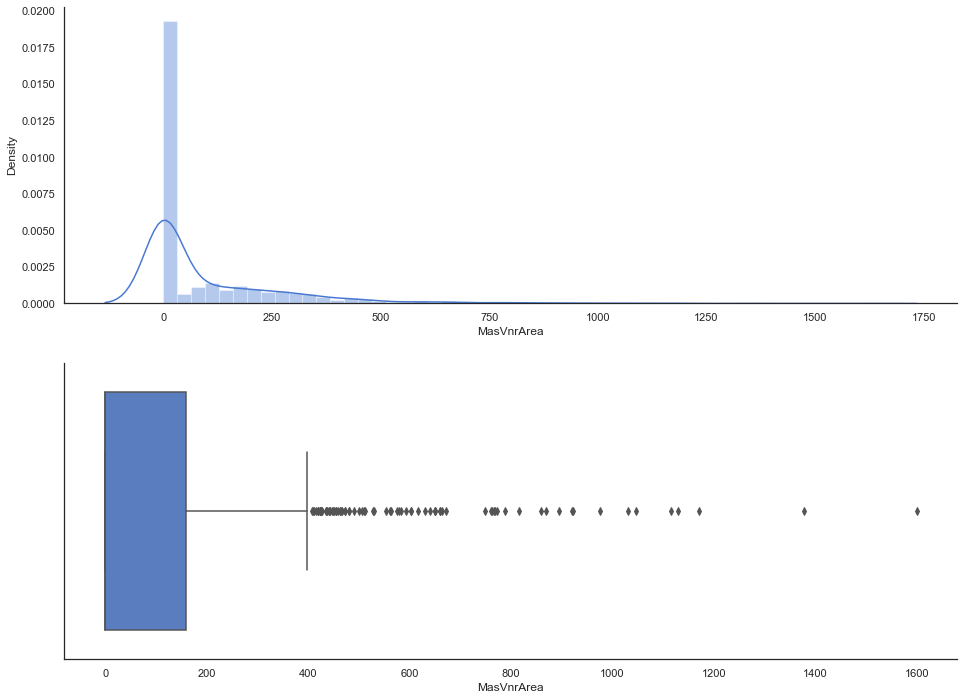

In [125]:
show_hist_and_box(train['MasVnrArea'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


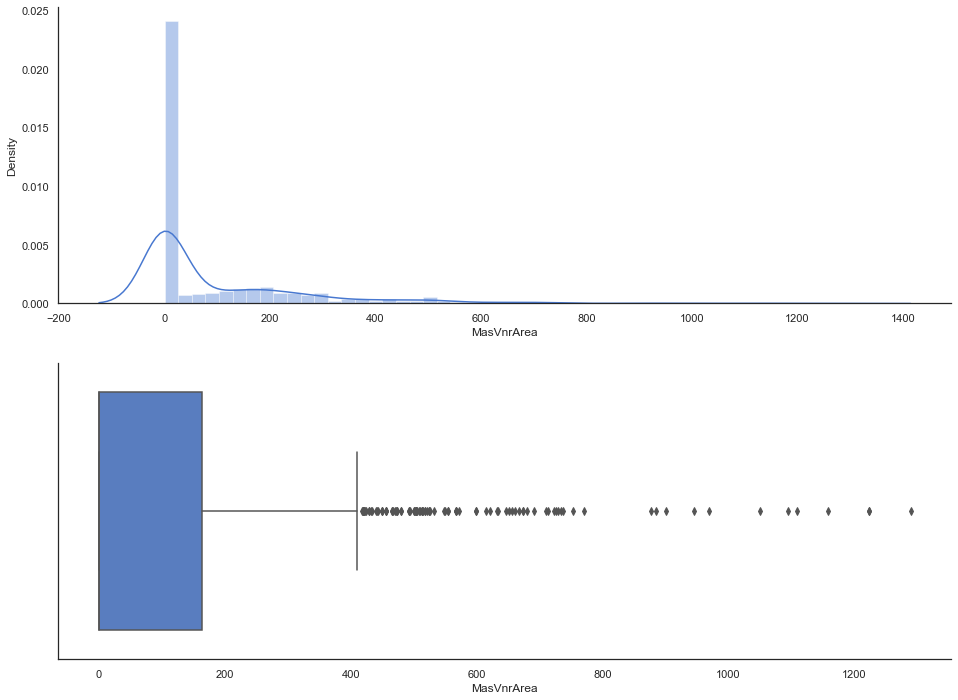

In [126]:
show_hist_and_box(test['MasVnrArea'])

In [127]:
test['MasVnrArea'].max()

1290.0

In [128]:
train = train[train['MasVnrArea'] < 1290]

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


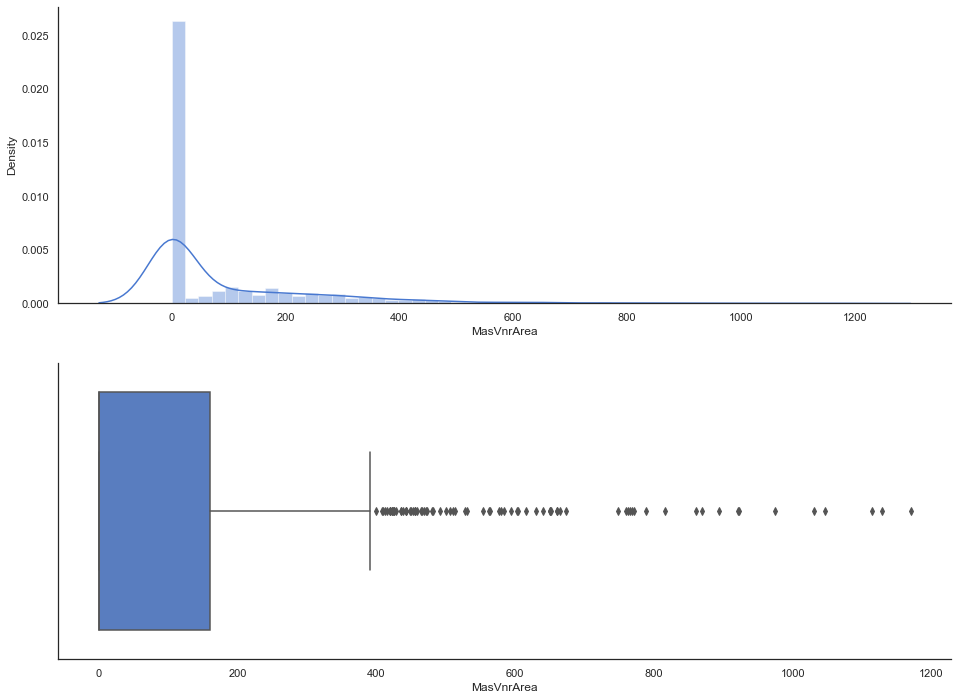

In [129]:
show_hist_and_box(train['MasVnrArea'])

In [130]:
show_train_test_col('MasVnrArea')

Количество пропусков в MasVnrArea в обучающем наборе = 0
Количество пропусков в MasVnrArea в тестовом наборе = 15


In [131]:
test[['Exterior2nd', 'Exterior1st', 'MasVnrArea', 'MasVnrType']][test['MasVnrArea'].isnull() | test['MasVnrType'].isnull()]

Exterior2nd Exterior1st  MasVnrArea MasVnrType
231      VinylSd     VinylSd         NaN        NaN
246      VinylSd     VinylSd         NaN        NaN
422      VinylSd     VinylSd         NaN        NaN
532      VinylSd     VinylSd         NaN        NaN
544      VinylSd     VinylSd         NaN        NaN
581      VinylSd     VinylSd         NaN        NaN
851      VinylSd     VinylSd         NaN        NaN
865      VinylSd     VinylSd         NaN        NaN
880      VinylSd     VinylSd         NaN        NaN
889      Wd Shng     WdShing         NaN        NaN
908      VinylSd     VinylSd         NaN        NaN
1132     VinylSd     VinylSd         NaN        NaN
1150     Plywood     Plywood       198.0        NaN
1197     CmentBd     CemntBd         NaN        NaN
1226     VinylSd     VinylSd         NaN        NaN
1402     VinylSd     VinylSd         NaN        NaN

In [132]:
test[(test['Exterior2nd'] == 'VinylSd')&(test['Exterior1st'] == 'VinylSd')]['MasVnrType'].value_counts()

None       243
BrkFace    174
Stone       72
BrkCmn       1
Name: MasVnrType, dtype: int64

In [133]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(test[(test['Exterior2nd'] == 'VinylSd')&(test['Exterior1st'] == 'VinylSd')]['MasVnrArea'].mean())

In [134]:
test['MasVnrType'] = test['MasVnrType'].fillna('None')

**Признак ExterQual**

Качество материала экстерьера

In [135]:
train['ExterQual'].value_counts()

TA    729
Gd    395
Ex     45
Fa     13
Name: ExterQual, dtype: int64

In [136]:
test['ExterQual'].value_counts()

TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64

In [137]:
show_train_test_col('ExterQual')

Количество пропусков в ExterQual в обучающем наборе = 0
Количество пропусков в ExterQual в тестовом наборе = 0


**Признак ExterCond**

Текущее состояние материала

In [138]:
train['ExterCond'].value_counts()

TA    1044
Gd     109
Fa      25
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [139]:
test['ExterCond'].value_counts()

TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64

In [140]:
show_train_test_col('ExterCond')

Количество пропусков в ExterCond в обучающем наборе = 0
Количество пропусков в ExterCond в тестовом наборе = 0


**Признак Foundation**

Тип основания

In [141]:
train['Foundation'].value_counts()

PConc     530
CBlock    488
BrkTil    137
Slab       19
Stone       6
Wood        2
Name: Foundation, dtype: int64

In [142]:
test['Foundation'].value_counts()

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [143]:
show_train_test_col('Foundation')

Количество пропусков в Foundation в обучающем наборе = 0
Количество пропусков в Foundation в тестовом наборе = 0


**Признак BsmtQual**

Высота подвала

In [144]:
train['BsmtQual'].value_counts()

TA    530
Gd    476
Ex    111
Fa     34
Name: BsmtQual, dtype: int64

In [145]:
test['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [146]:
show_train_test_col('BsmtQual')

Количество пропусков в BsmtQual в обучающем наборе = 31
Количество пропусков в BsmtQual в тестовом наборе = 44


In [147]:
x = train[['ExterCond', 'ExterQual', 'BsmtQual']][train['BsmtQual'].isnull()]
x

ExterCond ExterQual BsmtQual
17          TA        TA      NaN
39          TA        TA      NaN
90          TA        TA      NaN
102         Fa        TA      NaN
156         TA        TA      NaN
182         TA        TA      NaN
259         TA        TA      NaN
362         TA        Gd      NaN
371         TA        TA      NaN
520         TA        TA      NaN
532         TA        TA      NaN
533         Fa        Fa      NaN
553         TA        TA      NaN
646         TA        TA      NaN
705         Fa        Fa      NaN
736         TA        TA      NaN
749         TA        TA      NaN
778         TA        TA      NaN
894         TA        TA      NaN
897         TA        TA      NaN
984         TA        TA      NaN
1000        TA        TA      NaN
1011        TA        TA      NaN
1048        Fa        TA      NaN
1049        TA        TA      NaN
1090        TA        TA      NaN
1179        TA        TA      NaN
1216        TA        TA      NaN
1218        TA        TA      NaN
1232        TA        TA      NaN
1412        TA        TA      NaN

Уберем nan:

In [148]:
def del_nan(colname, *args):
    colname1, val1, colname2, val2, val_new = args
    for df in train, test:
        df.loc[(df[colname1] == val1)&(df[colname2] == val2) & df[colname].isnull(), colname] = val_new    

In [149]:
train[['ExterCond', 'ExterQual', 'BsmtQual']][(train['ExterCond'] == 'TA')&(train['ExterQual'] == 'TA')]['BsmtQual'].value_counts()

TA    412
Gd    151
Fa     25
Ex      8
Name: BsmtQual, dtype: int64

In [150]:
del_nan('BsmtQual', 'ExterCond', 'TA', 'ExterQual', 'TA', 'TA')

In [151]:
train[['ExterCond', 'ExterQual', 'BsmtQual']][(train['ExterCond'] == 'Fa')&(train['ExterQual'] == 'TA')]['BsmtQual'].value_counts()

TA    14
Fa     2
Gd     2
Name: BsmtQual, dtype: int64

In [152]:
del_nan('BsmtQual', 'ExterCond', 'Fa', 'ExterQual', 'TA', 'TA')

In [153]:
train[['ExterCond', 'ExterQual', 'BsmtQual']][(train['ExterCond'] == 'Fa')&(train['ExterQual'] == 'Fa')]['BsmtQual'].value_counts()

TA    3
Name: BsmtQual, dtype: int64

In [154]:
del_nan('BsmtQual', 'ExterCond', 'Fa', 'ExterQual', 'Fa', 'TA')

In [155]:
train[['ExterCond', 'ExterQual', 'BsmtQual']][(train['ExterCond'] == 'TA')&(train['ExterQual'] == 'Gd')]['BsmtQual'].value_counts()

Gd    286
Ex     62
TA     22
Name: BsmtQual, dtype: int64

In [156]:
del_nan('BsmtQual', 'ExterCond', 'TA', 'ExterQual', 'Gd', 'Gd')

In [157]:
show_train_test_col('BsmtQual')

Количество пропусков в BsmtQual в обучающем наборе = 0
Количество пропусков в BsmtQual в тестовом наборе = 7


In [158]:
y = test[['ExterCond', 'ExterQual', 'BsmtQual']][test['BsmtQual'].isnull()]
y

ExterCond ExterQual BsmtQual
125         Gd        TA      NaN
354         Gd        TA      NaN
662         Gd        TA      NaN
733         Gd        TA      NaN
756         Po        Fa      NaN
1030        TA        Fa      NaN
1242        Gd        TA      NaN

In [159]:
test[['ExterCond', 'ExterQual', 'BsmtQual']][(test['ExterCond'] == 'Gd')&(test['ExterQual'] == 'TA')]['BsmtQual'].value_counts()

TA    78
Gd    25
Fa     4
Name: BsmtQual, dtype: int64

In [160]:
del_nan('BsmtQual', 'ExterCond', 'Gd', 'ExterQual', 'TA', 'TA')

In [161]:
test[['ExterCond', 'ExterQual', 'BsmtQual']][(test['ExterCond'] == 'TA')&(test['ExterQual'] == 'Fa')]['BsmtQual'].value_counts()

Fa    2
TA    2
Gd    1
Name: BsmtQual, dtype: int64

In [162]:
del_nan('BsmtQual', 'ExterCond', 'Po', 'ExterQual', 'Fa', 'Fa')

In [163]:
del_nan('BsmtQual', 'ExterCond', 'TA', 'ExterQual', 'Fa', 'Fa')

In [164]:
show_train_test_col('BsmtQual')

Количество пропусков в BsmtQual в обучающем наборе = 0
Количество пропусков в BsmtQual в тестовом наборе = 0


**Признак BsmtCond**

Общее состояние подвала

In [165]:
train['BsmtCond'].value_counts()

TA    1055
Gd      53
Fa      42
Po       1
Name: BsmtCond, dtype: int64

In [166]:
test['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [167]:
show_train_test_col('BsmtCond')

Количество пропусков в BsmtCond в обучающем наборе = 31
Количество пропусков в BsmtCond в тестовом наборе = 45


In [168]:
x = train[['ExterCond', 'ExterQual', 'BsmtQual', 'BsmtCond']][train['BsmtCond'].isnull()]
x

ExterCond ExterQual BsmtQual BsmtCond
17          TA        TA       TA      NaN
39          TA        TA       TA      NaN
90          TA        TA       TA      NaN
102         Fa        TA       TA      NaN
156         TA        TA       TA      NaN
182         TA        TA       TA      NaN
259         TA        TA       TA      NaN
362         TA        Gd       Gd      NaN
371         TA        TA       TA      NaN
520         TA        TA       TA      NaN
532         TA        TA       TA      NaN
533         Fa        Fa       TA      NaN
553         TA        TA       TA      NaN
646         TA        TA       TA      NaN
705         Fa        Fa       TA      NaN
736         TA        TA       TA      NaN
749         TA        TA       TA      NaN
778         TA        TA       TA      NaN
894         TA        TA       TA      NaN
897         TA        TA       TA      NaN
984         TA        TA       TA      NaN
1000        TA        TA       TA      NaN
1011        TA        TA       TA      NaN
1048        Fa        TA       TA      NaN
1049        TA        TA       TA      NaN
1090        TA        TA       TA      NaN
1179        TA        TA       TA      NaN
1216        TA        TA       TA      NaN
1218        TA        TA       TA      NaN
1232        TA        TA       TA      NaN
1412        TA        TA       TA      NaN

In [169]:
for i in train, test:
    i.loc[i['BsmtCond'].isnull(), 'BsmtCond'] = 'TA'

In [170]:
show_train_test_col('BsmtCond')

Количество пропусков в BsmtCond в обучающем наборе = 0
Количество пропусков в BsmtCond в тестовом наборе = 0


**Признак BsmtExposure**

Стены подвала

In [171]:
train['BsmtExposure'].value_counts()

No    782
Av    182
Gd     95
Mn     91
Name: BsmtExposure, dtype: int64

In [172]:
test['BsmtExposure'].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [173]:
show_train_test_col('BsmtExposure')

Количество пропусков в BsmtExposure в обучающем наборе = 32
Количество пропусков в BsmtExposure в тестовом наборе = 44


In [176]:
x = train[['BsmtQual', 'BsmtCond', 'BsmtExposure']][train['BsmtExposure'].isnull()]
x

Empty DataFrame
Columns: [BsmtQual, BsmtCond, BsmtExposure]
Index: []

In [177]:
for i in train, test:
    i.loc[i['BsmtExposure'].isnull(), 'BsmtExposure'] = 'TA'

In [178]:
show_train_test_col('BsmtCond')

Количество пропусков в BsmtCond в обучающем наборе = 0
Количество пропусков в BsmtCond в тестовом наборе = 0


**Признак BsmtFinType1**

Качество подвального помещения

In [179]:
train['BsmtFinType1'].value_counts()

Unf    376
GLQ    328
ALQ    169
Rec    110
BLQ    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [180]:
test['BsmtFinType1'].value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [181]:
show_train_test_col('BsmtFinType1')

Количество пропусков в BsmtFinType1 в обучающем наборе = 31
Количество пропусков в BsmtFinType1 в тестовом наборе = 42


In [182]:
train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']][train['BsmtFinType1'].isnull()]

BsmtQual BsmtCond BsmtExposure BsmtFinType1
17         TA       TA           TA          NaN
39         TA       TA           TA          NaN
90         TA       TA           TA          NaN
102        TA       TA           TA          NaN
156        TA       TA           TA          NaN
182        TA       TA           TA          NaN
259        TA       TA           TA          NaN
362        Gd       TA           TA          NaN
371        TA       TA           TA          NaN
520        TA       TA           TA          NaN
532        TA       TA           TA          NaN
533        TA       TA           TA          NaN
553        TA       TA           TA          NaN
646        TA       TA           TA          NaN
705        TA       TA           TA          NaN
736        TA       TA           TA          NaN
749        TA       TA           TA          NaN
778        TA       TA           TA          NaN
894        TA       TA           TA          NaN
897        TA       TA           TA          NaN
984        TA       TA           TA          NaN
1000       TA       TA           TA          NaN
1011       TA       TA           TA          NaN
1048       TA       TA           TA          NaN
1049       TA       TA           TA          NaN
1090       TA       TA           TA          NaN
1179       TA       TA           TA          NaN
1216       TA       TA           TA          NaN
1218       TA       TA           TA          NaN
1232       TA       TA           TA          NaN
1412       TA       TA           TA          NaN

In [183]:
test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']][(test['BsmtQual'] == 'Gd')&(test['BsmtCond'] == 'TA')&(test['BsmtExposure'] == 'TA')]['BsmtFinType1'].value_counts()

Unf    2
Name: BsmtFinType1, dtype: int64

In [184]:
for i in train, test:
    i.loc[i['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'Unf'

In [185]:
show_train_test_col('BsmtFinType1')

Количество пропусков в BsmtFinType1 в обучающем наборе = 0
Количество пропусков в BsmtFinType1 в тестовом наборе = 0


**Признак BsmtFinSF1**

Тип 1 - квадратные фунты

In [186]:
train['BsmtFinSF1'].value_counts()

0       407
24       12
16        9
686       5
616       5
       ... 
897       1
299       1
1567      1
1261      1
830       1
Name: BsmtFinSF1, Length: 528, dtype: int64

In [187]:
test['BsmtFinSF1'].value_counts()

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 669, dtype: int64

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


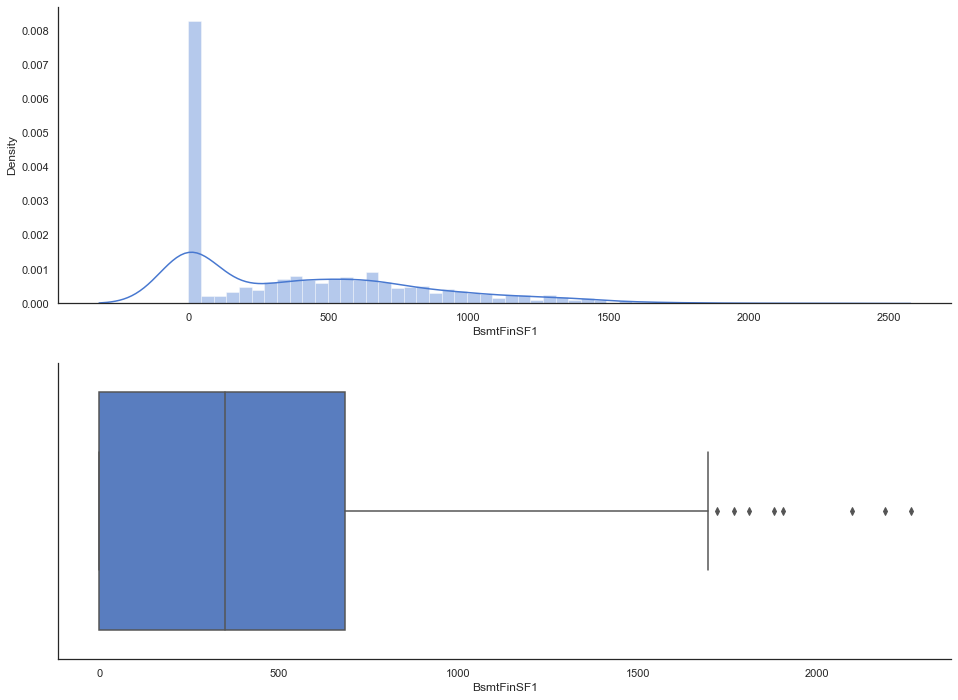

In [188]:
show_hist_and_box(train['BsmtFinSF1'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


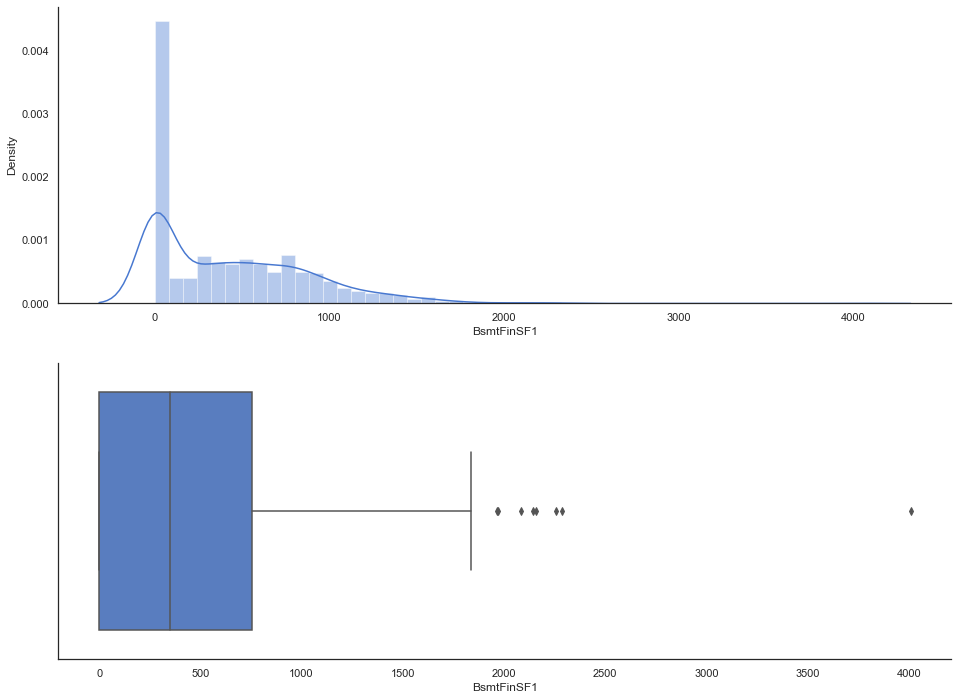

In [189]:
show_hist_and_box(test['BsmtFinSF1'])

In [190]:
show_train_test_col('BsmtFinSF1')

Количество пропусков в BsmtFinSF1 в обучающем наборе = 0
Количество пропусков в BsmtFinSF1 в тестовом наборе = 1


In [191]:
test.loc[test['BsmtFinSF1'].isnull(), 'BsmtFinSF1'] = 0

In [192]:
show_train_test_col('BsmtFinSF1')

Количество пропусков в BsmtFinSF1 в обучающем наборе = 0
Количество пропусков в BsmtFinSF1 в тестовом наборе = 0


**Признак BsmtFinType2**

Качество второго готового участка(если есть)

In [193]:
train['BsmtFinType2'].value_counts()

Unf    1027
Rec      37
LwQ      35
BLQ      26
ALQ      13
GLQ      12
Name: BsmtFinType2, dtype: int64

In [194]:
test['BsmtFinType2'].value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [195]:
show_train_test_col('BsmtFinType2')

Количество пропусков в BsmtFinType2 в обучающем наборе = 32
Количество пропусков в BsmtFinType2 в тестовом наборе = 42


In [196]:
for i in train, test:
    i.loc[i['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'Unf'

In [197]:
show_train_test_col('BsmtFinSF1')

Количество пропусков в BsmtFinSF1 в обучающем наборе = 0
Количество пропусков в BsmtFinSF1 в тестовом наборе = 0


**Признак BsmtFinSF2**

In [198]:
show_train_test_col('BsmtFinSF2')

Количество пропусков в BsmtFinSF2 в обучающем наборе = 0
Количество пропусков в BsmtFinSF2 в тестовом наборе = 1


In [199]:
test['BsmtFinSF2'].describe()

count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [200]:
train['BsmtFinSF2'].describe()

count    1182.000000
mean       41.610829
std       150.392844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [201]:
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)

**Признак BsmtUnfSF**

Незавершенные квадратные футы подвального помещения

In [202]:
show_train_test_col('BsmtUnfSF')

Количество пропусков в BsmtUnfSF в обучающем наборе = 0
Количество пропусков в BsmtUnfSF в тестовом наборе = 1


In [203]:
test['BsmtUnfSF'].describe()

count    1458.000000
mean      554.294925
std       437.260486
min         0.000000
25%       219.250000
50%       460.000000
75%       797.750000
max      2140.000000
Name: BsmtUnfSF, dtype: float64

In [204]:
train['BsmtUnfSF'].describe()

count    1182.000000
mean      591.217428
std       450.055621
min         0.000000
25%       246.250000
50%       509.000000
75%       838.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [205]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())

**Признак TotalBsmtSF**

Общая площадь подвала

In [206]:
show_train_test_col('TotalBsmtSF')

Количество пропусков в TotalBsmtSF в обучающем наборе = 0
Количество пропусков в TotalBsmtSF в тестовом наборе = 1


D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


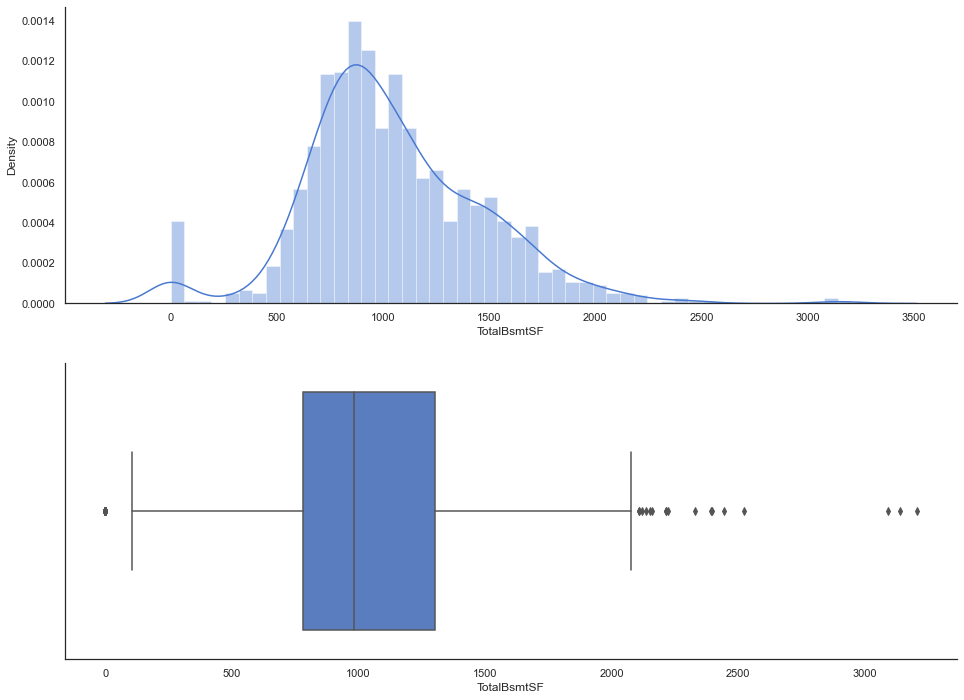

In [207]:
show_hist_and_box(train['TotalBsmtSF'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


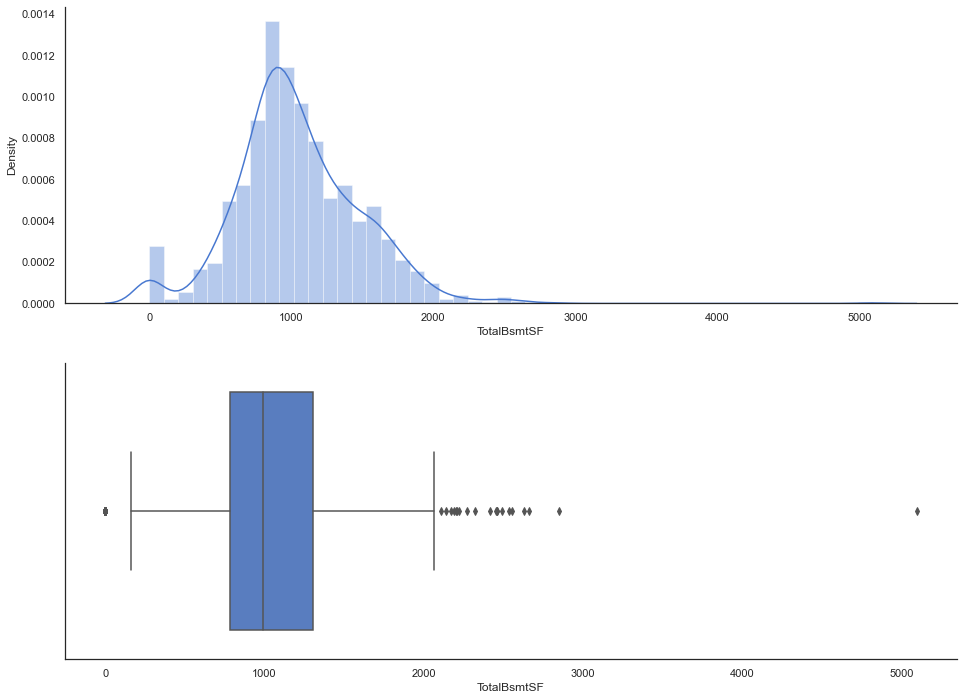

In [208]:
show_hist_and_box(test['TotalBsmtSF'])

In [209]:
test[test['TotalBsmtSF'] > 4000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1089  2550          20       RL        128.0    39290   Pave  Pave      IR1   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1089         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  
1089   17000     10    2007       New        Partial  

[1 rows x 80 columns]

In [210]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

**Признак Heating**

Тип отопления

In [211]:
train['Heating'].value_counts()

GasA    1155
GasW      17
Grav       6
Wall       3
OthW       1
Name: Heating, dtype: int64

In [212]:
test['Heating'].value_counts()

GasA    1446
GasW       9
Grav       2
Wall       2
Name: Heating, dtype: int64

In [213]:
show_train_test_col('Heating')

Количество пропусков в Heating в обучающем наборе = 0
Количество пропусков в Heating в тестовом наборе = 0


In [214]:
train = train[train['Heating'] != 'OthW']

In [215]:
train['Heating'].value_counts()

GasA    1155
GasW      17
Grav       6
Wall       3
Name: Heating, dtype: int64

**Признак HeatingQC**

Качество и состояние отопленияЪ

In [216]:
train['HeatingQC'].value_counts()

Ex    613
TA    337
Gd    193
Fa     37
Po      1
Name: HeatingQC, dtype: int64

In [217]:
test['HeatingQC'].value_counts()

Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64

In [218]:
show_train_test_col('HeatingQC')

Количество пропусков в HeatingQC в обучающем наборе = 0
Количество пропусков в HeatingQC в тестовом наборе = 0


**Признак CentralAir**

Центральное кондиционирование

In [219]:
train['CentralAir'].value_counts()

Y    1096
N      85
Name: CentralAir, dtype: int64

In [220]:
test['CentralAir'].value_counts()

Y    1358
N     101
Name: CentralAir, dtype: int64

In [221]:
show_train_test_col('CentralAir')

Количество пропусков в CentralAir в обучающем наборе = 0
Количество пропусков в CentralAir в тестовом наборе = 0


Заменим значения на числовые:

In [222]:
for i in train, test:
    i['CentralAir'] = i['CentralAir'].map({'Y':1, 'N':0})

In [223]:
train['CentralAir'].value_counts()

1    1096
0      85
Name: CentralAir, dtype: int64

In [224]:
test['CentralAir'].value_counts()

1    1358
0     101
Name: CentralAir, dtype: int64

**Признак Electrical**

Тип электросети

In [225]:
train['Electrical'].value_counts()

SBrkr    1072
FuseA      79
FuseF      25
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [226]:
test['Electrical'].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [227]:
show_train_test_col('Electrical')

Количество пропусков в Electrical в обучающем наборе = 1
Количество пропусков в Electrical в тестовом наборе = 0


In [228]:
train = train[train['Electrical'] != 'Mix']

In [229]:
train['Electrical'].value_counts()

SBrkr    1072
FuseA      79
FuseF      25
FuseP       3
Name: Electrical, dtype: int64

In [230]:
train[['Heating', 'HeatingQC', 'CentralAir', 'Electrical']][train['Electrical'].isnull()]

Heating HeatingQC  CentralAir Electrical
1379    GasA        Gd           1        NaN

In [231]:
train[(train['Heating'] == 'GasA')&(train['HeatingQC'] == 'Gd')&(train['CentralAir'] == 1)]['Electrical'].value_counts()

SBrkr    165
FuseA     13
FuseF      2
Name: Electrical, dtype: int64

In [232]:
train['Electrical'] = train['Electrical'].fillna('SBrkr')

**Признак 1stFlrSF**

Площадь первого этажа

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


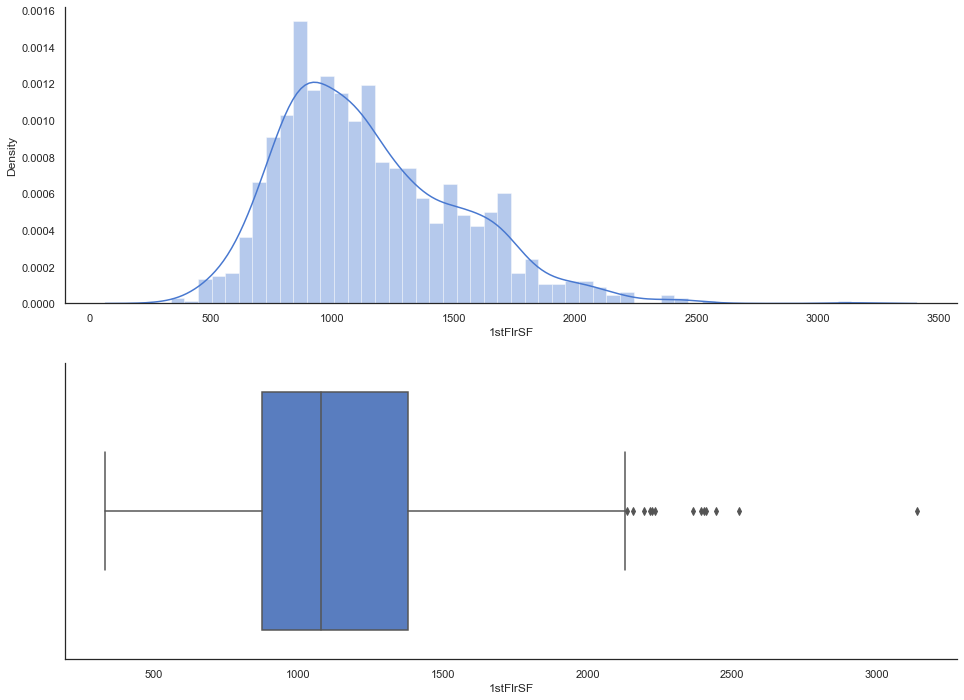

In [233]:
show_hist_and_box(train['1stFlrSF'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


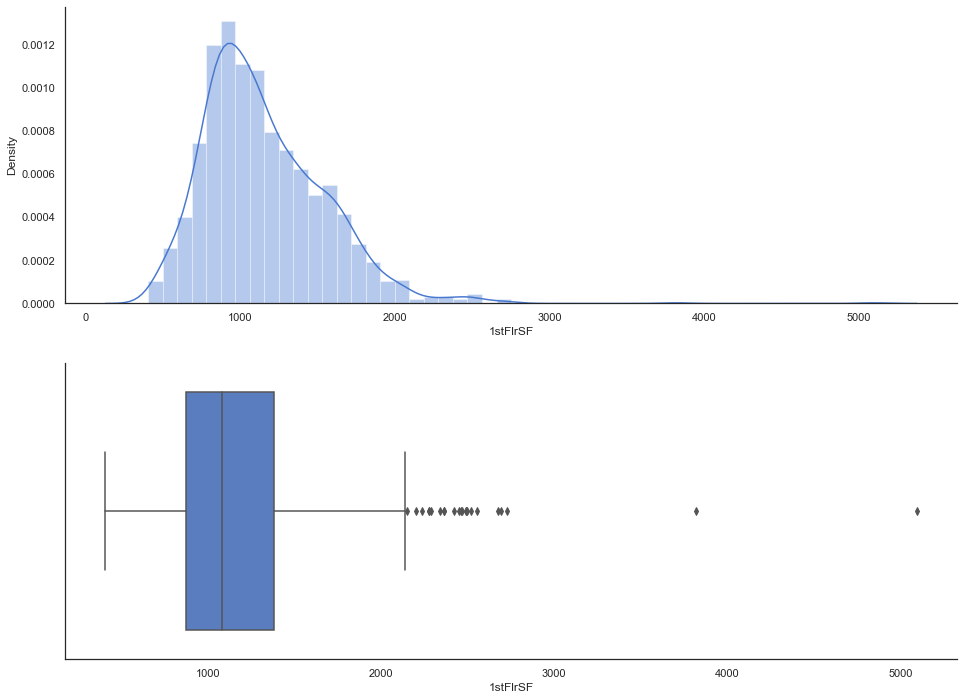

In [234]:
show_hist_and_box(test['1stFlrSF'])

In [235]:
show_train_test_col('1stFlrSF')

Количество пропусков в 1stFlrSF в обучающем наборе = 0
Количество пропусков в 1stFlrSF в тестовом наборе = 0


**Признак 2ndFlrSF**

Площадь второго этажа

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


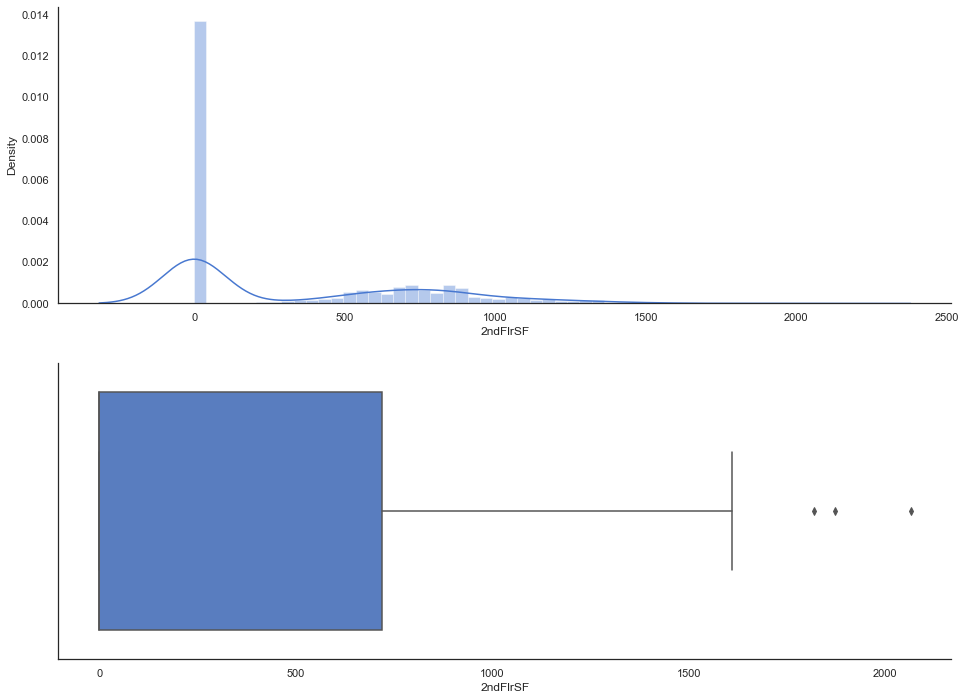

In [236]:
show_hist_and_box(train['2ndFlrSF'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


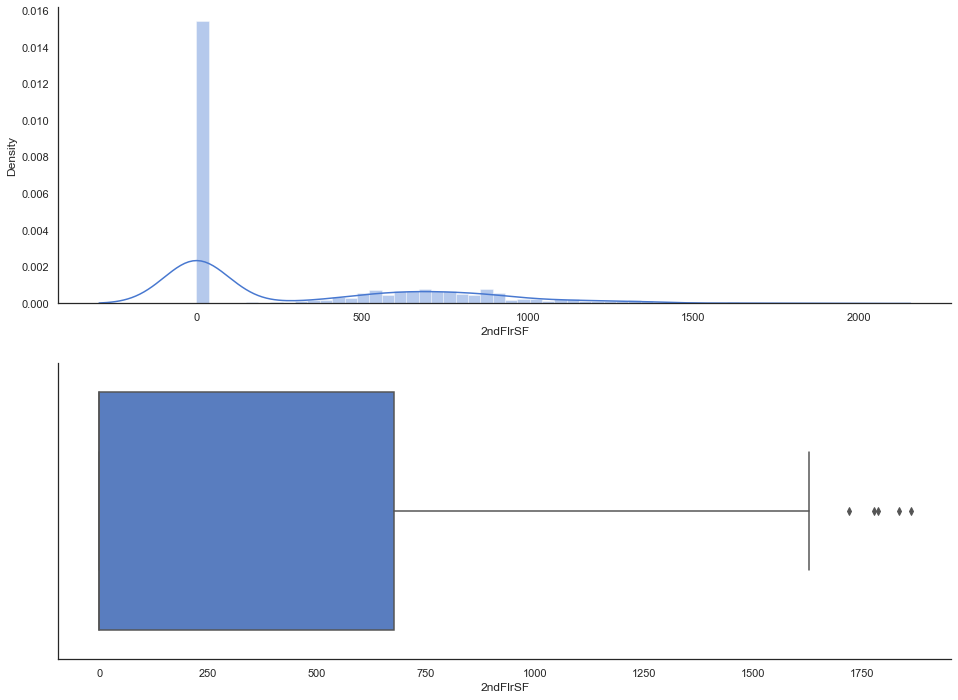

In [237]:
show_hist_and_box(test['2ndFlrSF'])

In [238]:
test['2ndFlrSF'].max()

1862

In [239]:
show_train_test_col('2ndFlrSF')

Количество пропусков в 2ndFlrSF в обучающем наборе = 0
Количество пропусков в 2ndFlrSF в тестовом наборе = 0


**Признак LowQualFinSF**

Площадь обоих этажей

In [240]:
train['LowQualFinSF'].value_counts()

0      1157
80        3
360       2
156       1
479       1
397       1
514       1
120       1
481       1
232       1
515       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [241]:
test['LowQualFinSF'].value_counts()

0       1445
362        1
1064       1
431        1
436        1
259        1
312        1
108        1
697        1
512        1
114        1
205        1
80         1
140        1
450        1
Name: LowQualFinSF, dtype: int64

In [242]:
show_train_test_col('LowQualFinSF')

Количество пропусков в LowQualFinSF в обучающем наборе = 0
Количество пропусков в LowQualFinSF в тестовом наборе = 0


**Признак GrLivArea**

Высота дома над уровнем земли

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


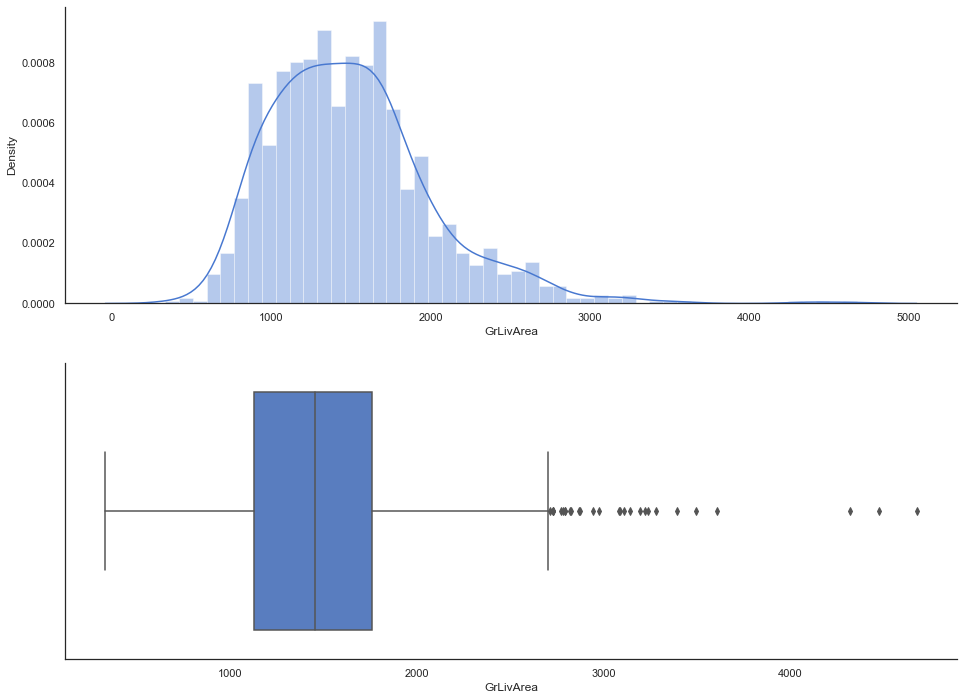

In [243]:
show_hist_and_box(train['GrLivArea'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


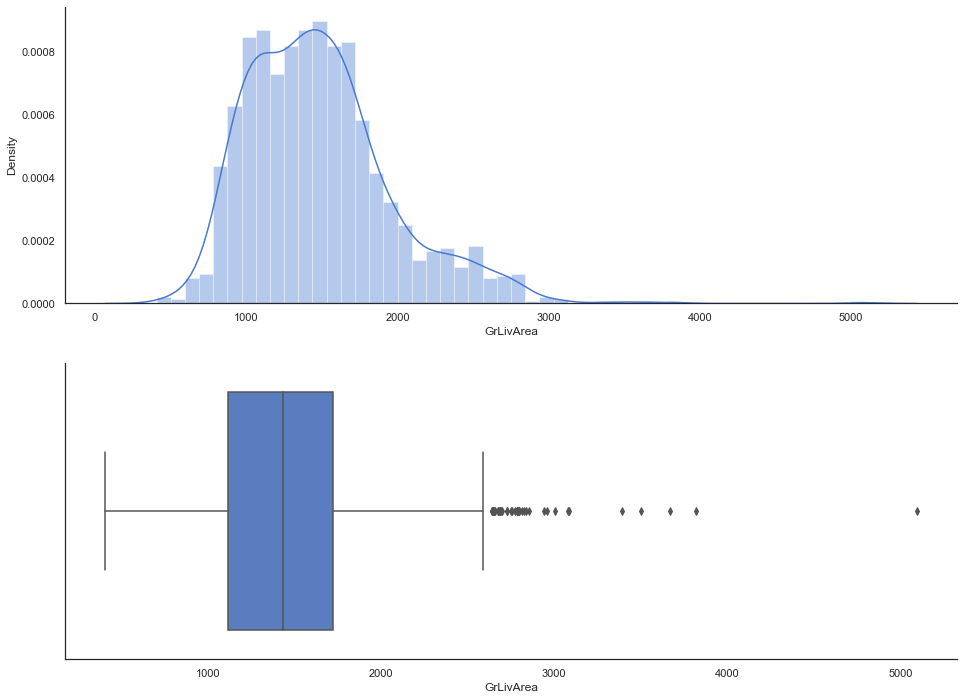

In [244]:
show_hist_and_box(test['GrLivArea'])

In [245]:
show_train_test_col('GrLivArea')

Количество пропусков в GrLivArea в обучающем наборе = 0
Количество пропусков в GrLivArea в тестовом наборе = 0


**Признак BsmtFullBath**

Подвал  - целые ванные комнаты

In [246]:
test['BsmtFullBath'].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [247]:
train['BsmtFullBath'].value_counts()

0    714
1    454
2     11
3      1
Name: BsmtFullBath, dtype: int64

In [248]:
show_train_test_col('BsmtFullBath')

Количество пропусков в BsmtFullBath в обучающем наборе = 0
Количество пропусков в BsmtFullBath в тестовом наборе = 2


**Признак BsmtHalfBath**

In [249]:
train['BsmtHalfBath'].value_counts()

0    1117
1      61
2       2
Name: BsmtHalfBath, dtype: int64

In [250]:
test['BsmtHalfBath'].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [251]:
show_train_test_col('BsmtHalfBath')

Количество пропусков в BsmtHalfBath в обучающем наборе = 0
Количество пропусков в BsmtHalfBath в тестовом наборе = 2


In [252]:
train[['BsmtFullBath', 'BsmtHalfBath']]

BsmtFullBath  BsmtHalfBath
0                1             0
1                0             1
2                1             0
3                1             0
4                1             0
...            ...           ...
1455             0             0
1456             1             0
1457             0             0
1458             1             0
1459             1             0

[1180 rows x 2 columns]

In [253]:
for i in ['BsmtFullBath', 'BsmtHalfBath']:
    test[i] = test[i].fillna(0)

In [254]:
show_train_test_col('BsmtHalfBath')

Количество пропусков в BsmtHalfBath в обучающем наборе = 0
Количество пропусков в BsmtHalfBath в тестовом наборе = 0


In [255]:
show_train_test_col('BsmtFullBath')

Количество пропусков в BsmtFullBath в обучающем наборе = 0
Количество пропусков в BsmtFullBath в тестовом наборе = 0


**Признак FullBath**

In [256]:
train['FullBath'].value_counts()

2    615
1    531
3     28
0      6
Name: FullBath, dtype: int64

In [257]:
test['FullBath'].value_counts()

2    762
1    659
3     31
4      4
0      3
Name: FullBath, dtype: int64

In [258]:
show_train_test_col('FullBath')

Количество пропусков в FullBath в обучающем наборе = 0
Количество пропусков в FullBath в тестовом наборе = 0


In [259]:
test.loc[test['FullBath'] == 4, 'FullBath'] = 3

In [260]:
test['FullBath'].value_counts()

2    762
1    659
3     35
0      3
Name: FullBath, dtype: int64

**Признак HalfBath**

In [261]:
train['HalfBath'].value_counts()

0    754
1    416
2     10
Name: HalfBath, dtype: int64

In [262]:
test['HalfBath'].value_counts()

0    921
1    525
2     13
Name: HalfBath, dtype: int64

In [263]:
show_train_test_col('HalfBath')

Количество пропусков в HalfBath в обучающем наборе = 0
Количество пропусков в HalfBath в тестовом наборе = 0


**Признак Bedroom**

Количество спален

In [264]:
train['BedroomAbvGr'].value_counts()

3    643
2    303
4    172
1     35
5     16
6      6
0      4
8      1
Name: BedroomAbvGr, dtype: int64

In [265]:
test['BedroomAbvGr'].value_counts()

3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64

In [266]:
show_train_test_col('BedroomAbvGr')

Количество пропусков в BedroomAbvGr в обучающем наборе = 0
Количество пропусков в BedroomAbvGr в тестовом наборе = 0


**Признак Kitchen**

In [267]:
train['KitchenAbvGr'].value_counts()

1    1119
2      58
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [268]:
test['KitchenAbvGr'].value_counts()

1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64

In [269]:
show_train_test_col('KitchenAbvGr')

Количество пропусков в KitchenAbvGr в обучающем наборе = 0
Количество пропусков в KitchenAbvGr в тестовом наборе = 0


**Признак KitchenQual**

In [270]:
train['KitchenQual'].value_counts()

TA    594
Gd    460
Ex     91
Fa     35
Name: KitchenQual, dtype: int64

In [271]:
test['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [272]:
show_train_test_col('KitchenQual')

Количество пропусков в KitchenQual в обучающем наборе = 0
Количество пропусков в KitchenQual в тестовом наборе = 1


In [273]:
test[(test['KitchenAbvGr'] == 1)&(test['BedroomAbvGr'] == 3)&(test['HalfBath'] == 1)&(test['FullBath'] == 1)]['KitchenQual'].value_counts()

TA    84
Gd    29
Fa     1
Ex     1
Name: KitchenQual, dtype: int64

In [274]:
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

In [275]:
show_train_test_col('KitchenQual')

Количество пропусков в KitchenQual в обучающем наборе = 0
Количество пропусков в KitchenQual в тестовом наборе = 0


**Признак TotRmsAbvGrd**

Количество комнат

In [276]:
train['TotRmsAbvGrd'].value_counts()

6     334
7     252
5     226
8     159
4      74
9      60
10     37
11     15
3      12
12      9
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [277]:
test['TotRmsAbvGrd'].value_counts()

6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
13      1
15      1
Name: TotRmsAbvGrd, dtype: int64

In [278]:
show_train_test_col('TotRmsAbvGrd')

Количество пропусков в TotRmsAbvGrd в обучающем наборе = 0
Количество пропусков в TotRmsAbvGrd в тестовом наборе = 0


**Признак Functional**

Рейтинг функциональности дома

In [279]:
train['Functional'].value_counts()

Typ     1099
Min2      28
Min1      24
Mod       13
Maj1      12
Maj2       4
Name: Functional, dtype: int64

In [280]:
test['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [281]:
show_train_test_col('Functional')

Количество пропусков в Functional в обучающем наборе = 0
Количество пропусков в Functional в тестовом наборе = 2


In [282]:
test[['TotRmsAbvGrd', 'KitchenQual', 'BedroomAbvGr', 'Functional']][test['Functional'].isnull()]

TotRmsAbvGrd KitchenQual  BedroomAbvGr Functional
756              4          Fa             2        NaN
1013             6          TA             3        NaN

In [283]:
test[(test['TotRmsAbvGrd'] == 4)&(test['KitchenQual'] == 'Fa')&(test['BedroomAbvGr'] == 2)]['Functional'].value_counts()

Typ    7
Name: Functional, dtype: int64

In [284]:
test[(test['TotRmsAbvGrd'] == 6)&(test['KitchenQual'] == 'TA')&(test['BedroomAbvGr'] == 3)]['Functional'].value_counts()

Typ     183
Min1      5
Mod       4
Min2      4
Name: Functional, dtype: int64

In [285]:
test['Functional'] = test['Functional'].fillna('Typ')

In [286]:
test.loc[test['Functional'] == 'Sev', 'Functional'] = 'Typ'

In [287]:
test['Functional'].value_counts()

Typ     1360
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Name: Functional, dtype: int64

In [288]:
show_train_test_col('Functional')

Количество пропусков в Functional в обучающем наборе = 0
Количество пропусков в Functional в тестовом наборе = 0


**Признак Fireplaces**

Количество каминов

In [289]:
train['Fireplaces'].value_counts()

0    592
1    510
2     75
3      3
Name: Fireplaces, dtype: int64

In [290]:
test['Fireplaces'].value_counts()

0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64

In [291]:
show_train_test_col('Fireplaces')

Количество пропусков в Fireplaces в обучающем наборе = 0
Количество пропусков в Fireplaces в тестовом наборе = 0


**Признак FireplaceQu**

In [292]:
train['FireplaceQu'].value_counts()

Gd    317
TA    212
Fa     23
Ex     21
Po     15
Name: FireplaceQu, dtype: int64

In [293]:
test['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [294]:
show_train_test_col('FireplaceQu')

Количество пропусков в FireplaceQu в обучающем наборе = 592
Количество пропусков в FireplaceQu в тестовом наборе = 730


In [295]:
for i in train, test:
    i['FireplaceQu'] = i['FireplaceQu'].fillna('Other')

In [296]:
show_train_test_col('FireplaceQu')

Количество пропусков в FireplaceQu в обучающем наборе = 0
Количество пропусков в FireplaceQu в тестовом наборе = 0


In [297]:
test['FireplaceQu'].value_counts()

Other    730
Gd       364
TA       279
Fa        41
Po        26
Ex        19
Name: FireplaceQu, dtype: int64

In [298]:
train['FireplaceQu'].value_counts()

Other    592
Gd       317
TA       212
Fa        23
Ex        21
Po        15
Name: FireplaceQu, dtype: int64

**Признаки Garage**

Расположение гаража

In [299]:
train['GarageType'].value_counts()

Attchd     679
Detchd     336
BuiltIn     65
Basment     15
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [300]:
test['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [301]:
show_train_test_col('GarageType')

Количество пропусков в GarageType в обучающем наборе = 72
Количество пропусков в GarageType в тестовом наборе = 76


Заполним пропуски в типе гаража на другие

In [302]:
for i in train, test:
    i['GarageType'] = i['GarageType'].fillna('Other')    

Удалим признаки GarageYrBlt, GarageFinish

In [303]:
train['GarageYrBlt'].value_counts()

2005.0    64
2006.0    58
2004.0    46
2007.0    45
2003.0    42
          ..
1906.0     1
1934.0     1
1942.0     1
1927.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [304]:
test['GarageYrBlt'].value_counts()

2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
          ..
1918.0     1
1895.0     1
1932.0     1
1916.0     1
1919.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [305]:
show_train_test_col('GarageYrBlt')

Количество пропусков в GarageYrBlt в обучающем наборе = 72
Количество пропусков в GarageYrBlt в тестовом наборе = 78


In [306]:
for i in train, test:
    i['GarageYrBlt'] = i['GarageYrBlt'].fillna(2000)

In [307]:
train['GarageFinish'].value_counts()

Unf    500
RFn    333
Fin    275
Name: GarageFinish, dtype: int64

In [308]:
test['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [309]:
show_train_test_col('GarageFinish')

Количество пропусков в GarageFinish в обучающем наборе = 72
Количество пропусков в GarageFinish в тестовом наборе = 78


In [310]:
for i in train, test:
    i['GarageFinish'] = i['GarageFinish'].fillna('Othr')

In [311]:
train['GarageCars'].value_counts()

2    628
1    311
3    165
0     72
4      4
Name: GarageCars, dtype: int64

In [312]:
test['GarageCars'].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [313]:
test[['YearBuilt', 'GarageCars', 'GarageArea', 'FullBath', 'BedroomAbvGr']][test['GarageCars'].isnull()|test['GarageArea'].isnull()]

YearBuilt  GarageCars  GarageArea  FullBath  BedroomAbvGr
1116       1923         NaN         NaN         2             3

In [314]:
test[(test['YearBuilt'] == 1923)&(test['TotRmsAbvGrd'] == 6)&(test['BedroomAbvGr'] == 3)]['GarageCars'].value_counts()

1.0    2
Name: GarageCars, dtype: int64

In [315]:
test[(test['YearBuilt'] == 1923)&(test['TotRmsAbvGrd'] == 6)&(test['BedroomAbvGr'] == 3)]['GarageArea'].value_counts()

216.0    1
205.0    1
Name: GarageArea, dtype: int64

In [316]:
test['GarageCars'] = test['GarageCars'].fillna(1)

In [317]:
test['GarageArea'] = test['GarageArea'].fillna(210)

In [318]:
show_train_test_col('GarageCars')

Количество пропусков в GarageCars в обучающем наборе = 0
Количество пропусков в GarageCars в тестовом наборе = 0


In [319]:
show_train_test_col('GarageArea')

Количество пропусков в GarageArea в обучающем наборе = 0
Количество пропусков в GarageArea в тестовом наборе = 0


In [320]:
show_train_test_col('GarageQual')

Количество пропусков в GarageQual в обучающем наборе = 72
Количество пропусков в GarageQual в тестовом наборе = 78


In [321]:
show_train_test_col('GarageCond')

Количество пропусков в GarageCond в обучающем наборе = 72
Количество пропусков в GarageCond в тестовом наборе = 78


In [322]:
train['GarageQual'].value_counts()

TA    1047
Fa      45
Gd      11
Ex       3
Po       2
Name: GarageQual, dtype: int64

In [323]:
test['GarageQual'].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [324]:
train.loc[train['GarageQual'] == 'Ex', 'GarageQual'] = 'Other'

In [325]:
for i in train, test:
    i['GarageQual'] = i['GarageQual'].fillna('Other')
    i['GarageCond'] = i['GarageCond'].fillna('Other')

In [326]:
train['GarageCond'].value_counts()

TA       1066
Other      72
Fa         30
Gd          5
Po          5
Ex          2
Name: GarageCond, dtype: int64

In [327]:
test['GarageCond'].value_counts()

TA       1328
Other      78
Fa         39
Po          7
Gd          6
Ex          1
Name: GarageCond, dtype: int64

**Признак PavedDrive**

Наличие асфальтированной дороги

In [328]:
train['PavedDrive'].value_counts()

Y    1077
N      79
P      24
Name: PavedDrive, dtype: int64

In [329]:
test['PavedDrive'].value_counts()

Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64

In [330]:
show_train_test_col('PavedDrive')

Количество пропусков в PavedDrive в обучающем наборе = 0
Количество пропусков в PavedDrive в тестовом наборе = 0


**Признак WoodDeckSF**

Площадь деревянной мансарды

In [331]:
train['WoodDeckSF'].value_counts()

0      624
192     35
100     31
144     29
168     23
      ... 
441      1
312      1
390      1
176      1
736      1
Name: WoodDeckSF, Length: 228, dtype: int64

In [332]:
test['WoodDeckSF'].value_counts()

0      762
100     38
192     32
168     28
144     28
      ... 
385      1
133      1
145      1
117      1
474      1
Name: WoodDeckSF, Length: 263, dtype: int64

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


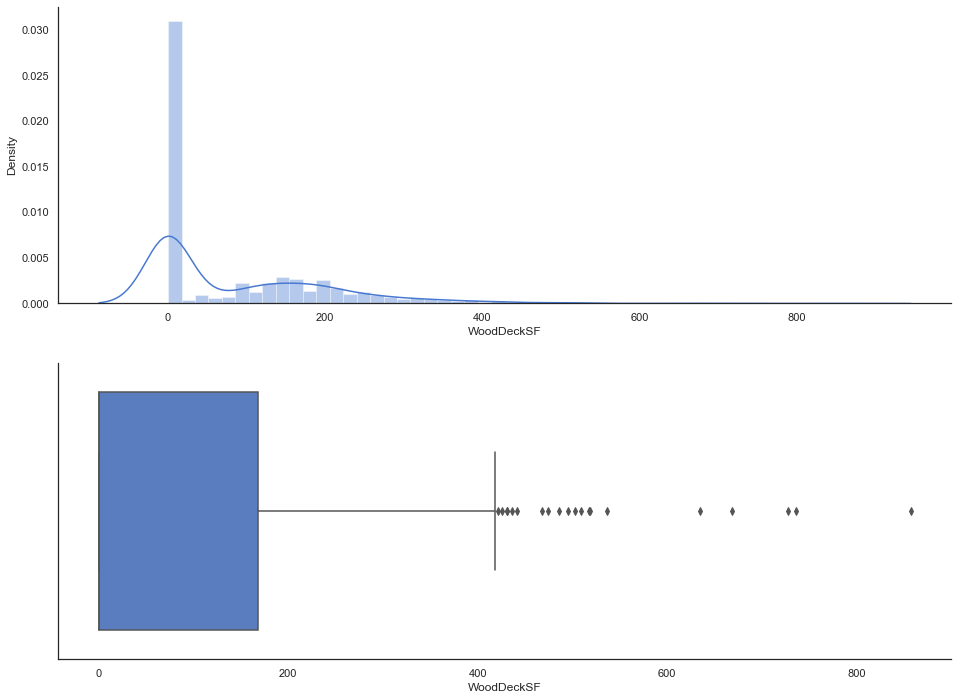

In [333]:
show_hist_and_box(train['WoodDeckSF'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


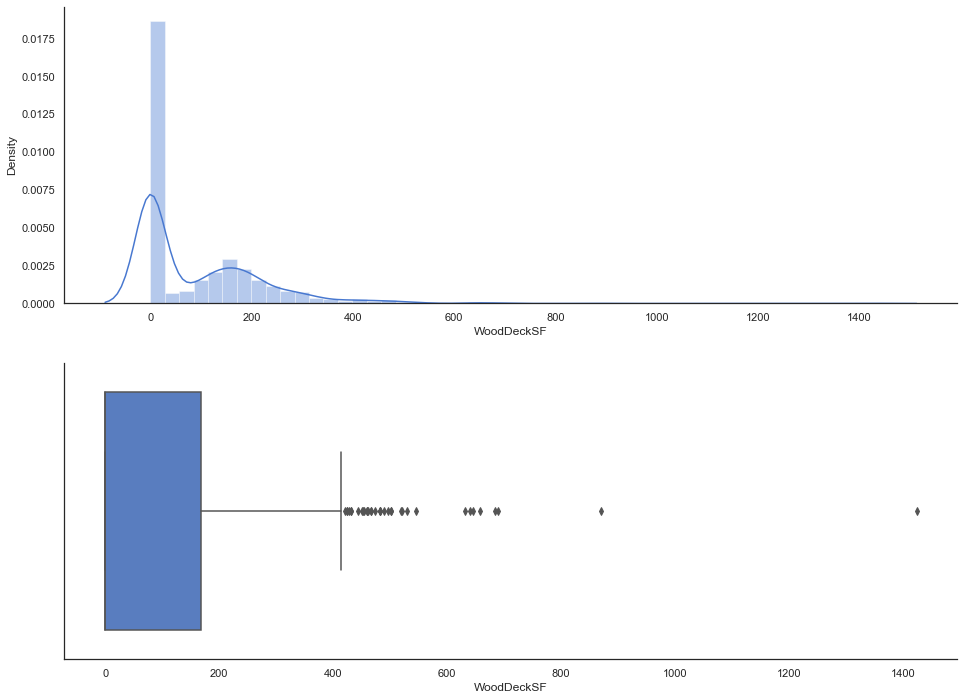

In [334]:
show_hist_and_box(test['WoodDeckSF'])

In [335]:
show_train_test_col('WoodDeckSF')

Количество пропусков в WoodDeckSF в обучающем наборе = 0
Количество пропусков в WoodDeckSF в тестовом наборе = 0


**Признак OpenPorchSF**

Площадь открытого крыльца

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


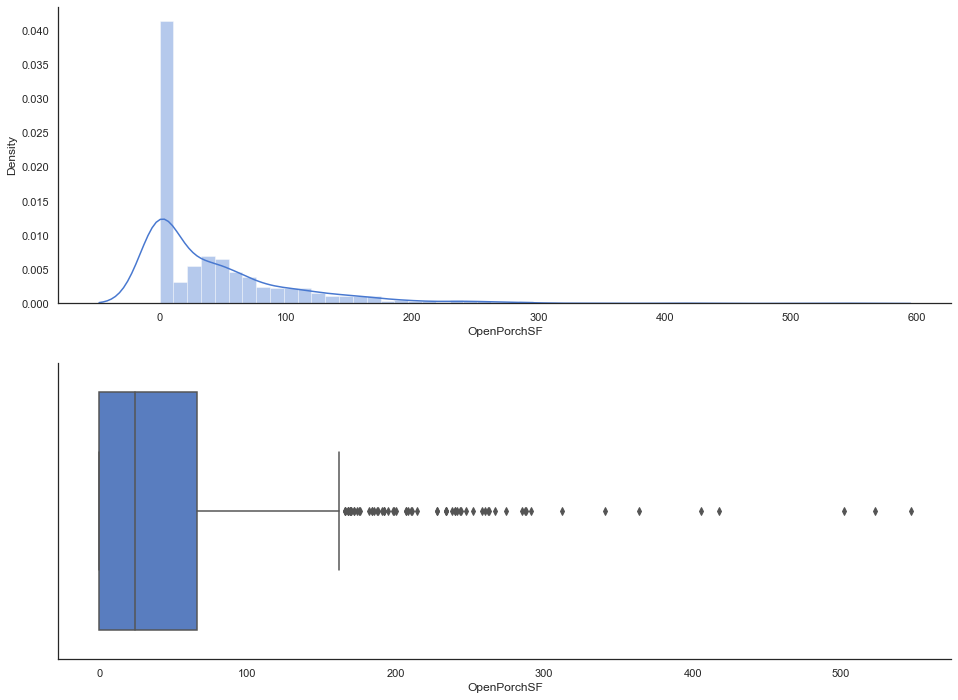

In [336]:
show_hist_and_box(train['OpenPorchSF'])

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


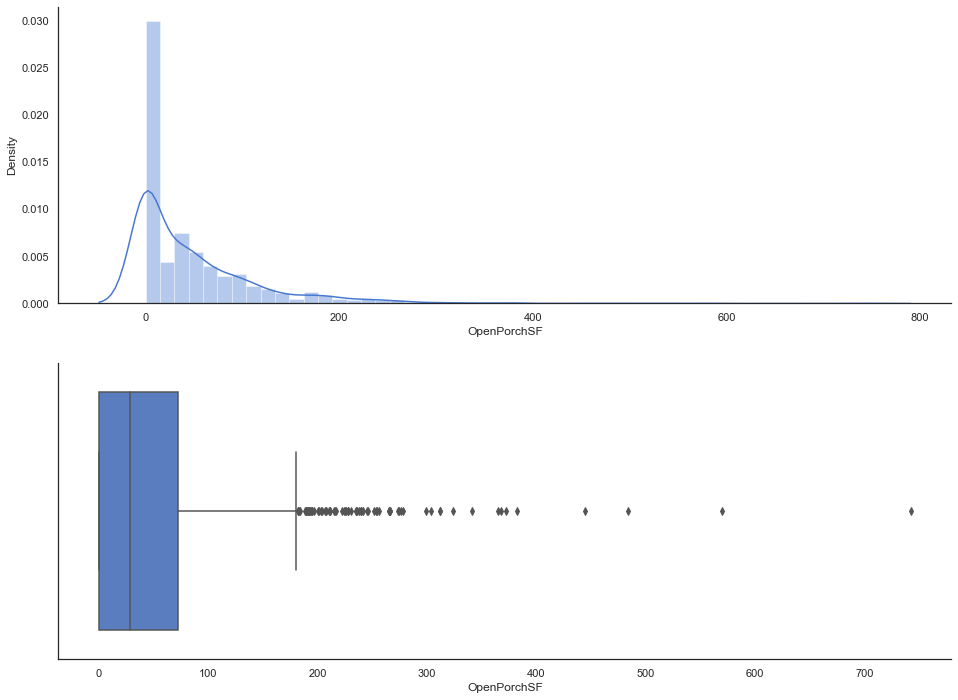

In [337]:
show_hist_and_box(test['OpenPorchSF'])

In [338]:
show_train_test_col('OpenPorchSF')

Количество пропусков в OpenPorchSF в обучающем наборе = 0
Количество пропусков в OpenPorchSF в тестовом наборе = 0


**Признак EnclosedPorch**

Площадь закрытого крыльца

In [339]:
train['OpenPorchSF'].value_counts()

0      533
36      25
45      18
20      17
30      14
      ... 
94       1
285      1
101      1
523      1
41       1
Name: OpenPorchSF, Length: 179, dtype: int64

In [340]:
test['OpenPorchSF'].value_counts()

0      642
48      29
32      27
40      25
36      23
      ... 
207      1
184      1
238      1
137      1
225      1
Name: OpenPorchSF, Length: 203, dtype: int64

In [341]:
show_train_test_col('OpenPorchSF')

Количество пропусков в OpenPorchSF в обучающем наборе = 0
Количество пропусков в OpenPorchSF в тестовом наборе = 0


**Признак 3SsnPorch**

In [342]:
train['3SsnPorch'].value_counts()

0      1162
180       2
168       2
144       2
320       1
407       1
140       1
508       1
245       1
196       1
162       1
23        1
216       1
96        1
153       1
304       1
Name: 3SsnPorch, dtype: int64

In [343]:
test['3SsnPorch'].value_counts()

0      1446
153       2
224       1
255       1
225       1
360       1
150       1
174       1
120       1
219       1
176       1
86        1
323       1
Name: 3SsnPorch, dtype: int64

**Признак ScreenPorch**

Площадь навеса

In [344]:
train['ScreenPorch'].value_counts()

0      1087
192       5
224       4
120       4
180       4
       ... 
198       1
291       1
260       1
385       1
165       1
Name: ScreenPorch, Length: 63, dtype: int64

In [345]:
test['ScreenPorch'].value_counts()

0      1319
144      10
168       7
216       6
192       5
       ... 
221       1
171       1
135       1
322       1
104       1
Name: ScreenPorch, Length: 75, dtype: int64

In [346]:
show_train_test_col('ScreenPorch')

Количество пропусков в ScreenPorch в обучающем наборе = 0
Количество пропусков в ScreenPorch в тестовом наборе = 0


**Признак PoolArea**

Площадь бассейна

In [347]:
train['PoolArea'].value_counts()

0      1175
512       1
648       1
576       1
555       1
519       1
Name: PoolArea, dtype: int64

In [348]:
test['PoolArea'].value_counts()

0      1453
144       1
368       1
444       1
228       1
561       1
800       1
Name: PoolArea, dtype: int64

In [349]:
show_train_test_col('PoolArea')

Количество пропусков в PoolArea в обучающем наборе = 0
Количество пропусков в PoolArea в тестовом наборе = 0


**Признак PoolQC**

Состояние бассейна

In [350]:
train['PoolQC'].value_counts()

Ex    2
Fa    2
Gd    1
Name: PoolQC, dtype: int64

In [351]:
test['PoolQC'].value_counts()

Ex    2
Gd    1
Name: PoolQC, dtype: int64

In [352]:
train.loc[train['PoolQC'] == 'Fa', 'PoolQC'] = 'Ex'

In [353]:
train['PoolQC'].value_counts()

Ex    4
Gd    1
Name: PoolQC, dtype: int64

In [354]:
for i in train, test:
    i['PoolQC'] = i['PoolQC'].fillna('Un')

In [355]:
show_train_test_col('PoolQC')

Количество пропусков в PoolQC в обучающем наборе = 0
Количество пропусков в PoolQC в тестовом наборе = 0


**Признак Fence**

Качество забора

In [356]:
train['Fence'].value_counts()

MnPrv    128
GdPrv     47
GdWo      42
MnWw      10
Name: Fence, dtype: int64

In [357]:
test['Fence'].value_counts()

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64

In [358]:
for i in train, test:
    i['Fence'] = i['Fence'].fillna('UnKn')

In [359]:
show_train_test_col('Fence')

Количество пропусков в Fence в обучающем наборе = 0
Количество пропусков в Fence в тестовом наборе = 0


**Признак MiscFeature**

Разные функции, не относящиеся к другим категориям

In [360]:
train['MiscFeature'].value_counts()

Shed    36
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [361]:
test['MiscFeature'].value_counts()

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64

In [362]:
train.loc[train['MiscFeature'] == 'TenC', 'MiscFeature'] = 'Othr'

In [363]:
test.loc[test['MiscFeature'] == 'Gar2', 'MiscFeature'] = 'Othr'

In [364]:
train['MiscFeature'].value_counts()

Shed    36
Othr     3
Name: MiscFeature, dtype: int64

In [365]:
test['MiscFeature'].value_counts()

Shed    46
Othr     5
Name: MiscFeature, dtype: int64

In [366]:
for i in train, test:
    i['MiscFeature'] = i['MiscFeature'].fillna('Othr')

In [367]:
show_train_test_col('MiscFeature')

Количество пропусков в MiscFeature в обучающем наборе = 0
Количество пропусков в MiscFeature в тестовом наборе = 0


**Признак MiscVal**

Значение различных функций

In [368]:
train['MiscVal'].value_counts()

0       1143
400       10
500        5
450        3
2000       3
600        3
700        2
54         1
1150       1
1400       1
560        1
620        1
3500       1
1200       1
1300       1
480        1
800        1
2500       1
Name: MiscVal, dtype: int64

In [369]:
test['MiscVal'].value_counts()

0        1408
400         7
500         5
450         5
600         4
650         3
2000        3
1500        3
3000        2
4500        2
700         2
455         1
6500        1
17000       1
460         1
1000        1
1512        1
2500        1
750         1
12500       1
900         1
1200        1
490         1
80          1
300         1
420         1
Name: MiscVal, dtype: int64

In [370]:
show_train_test_col('MiscVal')

Количество пропусков в MiscVal в обучающем наборе = 0
Количество пропусков в MiscVal в тестовом наборе = 0


**Признак MoSold**

Месяц продажи

In [371]:
train['MoSold'].value_counts()

6     197
7     196
5     160
4     117
8     101
3      81
10     76
11     60
9      56
1      48
2      44
12     44
Name: MoSold, dtype: int64

In [372]:
test['MoSold'].value_counts()

6     250
7     212
5     190
4     138
3     126
8     111
9      95
10     84
2      81
1      64
11     63
12     45
Name: MoSold, dtype: int64

In [373]:
show_train_test_col('MoSold')

Количество пропусков в MoSold в обучающем наборе = 0
Количество пропусков в MoSold в тестовом наборе = 0


**Признак YrSold**

Год продажи

In [374]:
train['YrSold'].value_counts()

2009    271
2007    262
2006    259
2008    246
2010    142
Name: YrSold, dtype: int64

In [375]:
test['YrSold'].value_counts()

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64

In [376]:
show_train_test_col('MoSold')

Количество пропусков в MoSold в обучающем наборе = 0
Количество пропусков в MoSold в тестовом наборе = 0


**Признак SaleType**

Тип продажи

In [377]:
train['SaleType'].value_counts()

WD       1006
New       116
COD        32
ConLD       8
ConLw       5
ConLI       4
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [378]:
test['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [379]:
show_train_test_col('SaleType')

Количество пропусков в SaleType в обучающем наборе = 0
Количество пропусков в SaleType в тестовом наборе = 1


In [380]:
test[['SaleCondition', 'MoSold', 'YrSold', 'SaleType']][test['SaleType'].isnull()]

SaleCondition  MoSold  YrSold SaleType
1029        Normal      10    2007      NaN

In [381]:
test[test['SaleCondition'] == 'Normal']['SaleType'].value_counts()

WD       1154
COD        20
ConLD      15
CWD         8
ConLw       2
Con         2
ConLI       1
Oth         1
Name: SaleType, dtype: int64

In [382]:
test['SaleType'] = test['SaleType'].fillna('WD')

**Признак SaleCondition**

Условия продажи

In [383]:
train['SaleCondition'].value_counts()

Normal     947
Partial    119
Abnorml     82
Family      18
Alloca      10
AdjLand      4
Name: SaleCondition, dtype: int64

In [384]:
test['SaleCondition'].value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [385]:
show_train_test_col('SaleCondition')

Количество пропусков в SaleCondition в обучающем наборе = 0
Количество пропусков в SaleCondition в тестовом наборе = 0


**Признак SalePrice**

D:\projects\my_kaggle\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\projects\my_kaggle\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


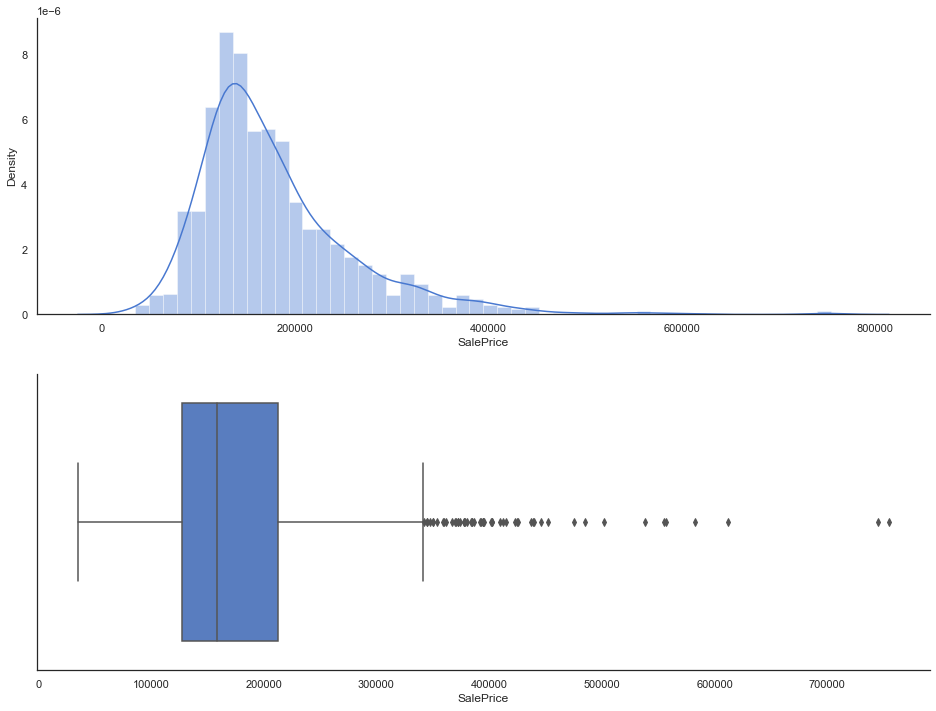

In [386]:
show_hist_and_box(train['SalePrice'])

In [387]:
show_nan(train)

In [388]:
show_nan(test)

In [389]:
import os

In [390]:

if not os.path.exists('datasets\\output'):
    os.makedirs('datasets\\output')    # создать директорию, если она не существует

test.to_csv('datasets\\output\\test_clear.csv')# Таблица с общим количеством документов
train.to_csv('datasets\\output\\train_clear.csv')